In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import plotly
import plotly.express as px

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('C:/Users/armaa/OneDrive/Documents/GitHub/Capstone_Project-Crime-in-india/Capstone-Project/Datasets/01_District_wise_crimes_committed_IPC_2001_2012.csv')
df2=pd.read_csv('C:/Users/armaa/OneDrive/Documents/GitHub/Capstone_Project-Crime-in-india/Capstone-Project/Datasets/42_District_wise_crimes_committed_against_women_2001_2012.csv')
df3=pd.read_csv('C:/Users/armaa/OneDrive/Documents/GitHub/Capstone_Project-Crime-in-india/Capstone-Project/Datasets/03_District_wise_crimes_committed_against_children_2001_2012.csv') 
df4=pd.read_csv('C:/Users/armaa/OneDrive/Documents/GitHub/Capstone_Project-Crime-in-india/Capstone-Project/Datasets/02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')
df5=pd.read_csv('C:/Users/armaa/OneDrive/Documents/GitHub/Capstone_Project-Crime-in-india/Capstone-Project/Datasets/02_District_wise_crimes_committed_against_ST_2001_2012.csv')

In [3]:
print("df1 columns:", df1.columns)
print("df2 columns:", df2.columns)
print("df3 columns:", df3.columns)
print("df4 columns:", df4.columns)
print("df5 columns:", df5.columns)


df1 columns: Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')
df2 columns: Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage h

In [4]:
df2.columns = df2.columns.str.strip()

In [5]:
print(df2.columns)


Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')


In [6]:
# Print the columns of df3
print(df3.columns)

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Total'],
      dtype='object')


In [7]:
# Print the columns of df4
print(df4.columns)

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'],
      dtype='object')


In [8]:
# Print the columns of df5
print(df5.columns)

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs'],
      dtype='object')


In [10]:
df1_reset=df1
df2_reset=df2
df3_reset=df3
df4_reset=df4
df5_reset=df5


In [11]:
print(df1_reset[df1_reset.duplicated(['STATE/UT', 'DISTRICT'], keep=False)])
print(df2_reset[df2_reset.duplicated(['STATE/UT', 'DISTRICT'], keep=False)])
print(df3_reset[df3_reset.duplicated(['STATE/UT', 'DISTRICT'], keep=False)])
print(df4_reset[df4_reset.duplicated(['STATE/UT', 'DISTRICT'], keep=False)])
print(df5_reset[df5_reset.duplicated(['STATE/UT', 'DISTRICT'], keep=False)])


            STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9012     LAKSHADWEEP    LAKSHADWEEP  2012       0                  0   
9013     LAKSHADWEEP          TOTAL  2012       0                  0   
9014      PUDUCHERRY       KARAIKAL  2012       5                  6   
9015      PUDUCHERRY     PUDUCHERRY  2012      24                 21   
9016      PUDUCHERRY          TOTAL  2012      29                 27   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                            17    50         

In [14]:
import pandas as pd

# Assuming 'STATE/UT' and 'DISTRICT' columns are common across all DataFrames
df_merged = pd.merge(df1, df2[['STATE/UT', 'DISTRICT']], on=['STATE/UT', 'DISTRICT'], how='left')

# Display the merged DataFrame
print(df_merged.head())


         STATE/UT  DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH  ADILABAD  2001     101                 60   
1  ANDHRA PRADESH  ADILABAD  2001     101                 60   
2  ANDHRA PRADESH  ADILABAD  2001     101                 60   
3  ANDHRA PRADESH  ADILABAD  2001     101                 60   
4  ANDHRA PRADESH  ADILABAD  2001     101                 60   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                         17    50               0   
2                                         17    50               0   
3                                         17    50               0   
4                                         17    50               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0          50                      46  ...     30                1131   
1          50                      46  ...     3

In [15]:
# Cheking columns Inforamtion using info method
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102125 entries, 0 to 102124
Data columns (total 33 columns):
 #   Column                                               Non-Null Count   Dtype 
---  ------                                               --------------   ----- 
 0   STATE/UT                                             102125 non-null  object
 1   DISTRICT                                             102125 non-null  object
 2   YEAR                                                 102125 non-null  int64 
 3   MURDER                                               102125 non-null  int64 
 4   ATTEMPT TO MURDER                                    102125 non-null  int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            102125 non-null  int64 
 6   RAPE                                                 102125 non-null  int64 
 7   CUSTODIAL RAPE                                       102125 non-null  int64 
 8   OTHER RAPE                                           102125 non-

In [16]:
## checking for missing values
df_merged.isna().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [17]:
df = df_merged.dropna()


In [18]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
2,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
3,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
4,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102120,PUDUCHERRY,TOTAL,2012,29,27,12,13,0,13,19,...,21,818,0,9,2,6,0,263,2060,4281
102121,PUDUCHERRY,TOTAL,2012,29,27,12,13,0,13,19,...,21,818,0,9,2,6,0,263,2060,4281
102122,PUDUCHERRY,TOTAL,2012,29,27,12,13,0,13,19,...,21,818,0,9,2,6,0,263,2060,4281
102123,PUDUCHERRY,TOTAL,2012,29,27,12,13,0,13,19,...,21,818,0,9,2,6,0,263,2060,4281


In [19]:
df.reset_index(inplace=True)


In [20]:
df['DISTRICT'].value_counts()

TOTAL            4896
G.R.P.            514
RAILWAYS          409
SOUTH             301
NORTH             301
                 ... 
MIDNAPUR            1
RAILWAYS KMR        1
CRIME KASHMIR       1
G.R.P. AJMER        1
CAR                 1
Name: DISTRICT, Length: 808, dtype: int64

In [21]:
## Getting the index values of the 'TOTAL' rows
print(list(np.where(df1["DISTRICT"]=='TOTAL')))

[array([  28,   42,   70,  115,  135,  138,  169,  190,  204,  228,  253,
        285,  302,  351,  397,  407,  415,  424,  435,  470,  495,  529,
        534,  573,  578,  650,  664,  688,  691,  693,  695,  698,  713,
        715,  744,  758,  786,  831,  851,  854,  885,  906,  920,  945,
        970, 1002, 1019, 1068, 1114, 1124, 1132, 1141, 1152, 1187, 1212,
       1246, 1251, 1289, 1294, 1366, 1380, 1406, 1409, 1411, 1413, 1416,
       1432, 1434, 1464, 1480, 1508, 1553, 1574, 1577, 1608, 1629, 1643,
       1668, 1693, 1725, 1745, 1797, 1843, 1853, 1861, 1870, 1881, 1916,
       1941, 1975, 1980, 2018, 2023, 2095, 2109, 2135, 2138, 2140, 2142,
       2145, 2160, 2162, 2192, 2208, 2236, 2281, 2302, 2305, 2336, 2357,
       2371, 2396, 2421, 2453, 2473, 2525, 2571, 2581, 2589, 2598, 2609,
       2644, 2669, 2703, 2708, 2747, 2752, 2824, 2838, 2864, 2867, 2869,
       2871, 2874, 2889, 2891, 2921, 2937, 2968, 3013, 3035, 3038, 3069,
       3091, 3105, 3130, 3155, 3187, 3207, 3259, 3

In [22]:
print(list(np.where(df1["DISTRICT"]=='TOTAL')))

[array([  28,   42,   70,  115,  135,  138,  169,  190,  204,  228,  253,
        285,  302,  351,  397,  407,  415,  424,  435,  470,  495,  529,
        534,  573,  578,  650,  664,  688,  691,  693,  695,  698,  713,
        715,  744,  758,  786,  831,  851,  854,  885,  906,  920,  945,
        970, 1002, 1019, 1068, 1114, 1124, 1132, 1141, 1152, 1187, 1212,
       1246, 1251, 1289, 1294, 1366, 1380, 1406, 1409, 1411, 1413, 1416,
       1432, 1434, 1464, 1480, 1508, 1553, 1574, 1577, 1608, 1629, 1643,
       1668, 1693, 1725, 1745, 1797, 1843, 1853, 1861, 1870, 1881, 1916,
       1941, 1975, 1980, 2018, 2023, 2095, 2109, 2135, 2138, 2140, 2142,
       2145, 2160, 2162, 2192, 2208, 2236, 2281, 2302, 2305, 2336, 2357,
       2371, 2396, 2421, 2453, 2473, 2525, 2571, 2581, 2589, 2598, 2609,
       2644, 2669, 2703, 2708, 2747, 2752, 2824, 2838, 2864, 2867, 2869,
       2871, 2874, 2889, 2891, 2921, 2937, 2968, 3013, 3035, 3038, 3069,
       3091, 3105, 3130, 3155, 3187, 3207, 3259, 3

In [23]:
print(list(np.where(df1["DISTRICT"]=='DELHI UT TOTAL')))

[array([ 700, 1418, 2147, 2876, 3609, 4348, 5090, 5849, 6616, 7395, 8186,
       8997], dtype=int64)]


In [24]:
df.drop([  700, 1418, 2147, 2876, 3609, 4348, 5090, 5849, 6616, 7395, 8186,
       8997,28,   42,   70,  115,  135,  138,  169,  190,  204,  228,  253,
        285,  302,  351,  397,  407,  415,  424,  435,  470,  495,  529,
        534,  573,  578,  650,  664,  688,  691,  693,  695,  698,  713,
        715,  744,  758,  786,  831,  851,  854,  885,  906,  920,  945,
        970, 1002, 1019, 1068, 1114, 1124, 1132, 1141, 1152, 1187, 1212,
       1246, 1251, 1289, 1294, 1366, 1380, 1406, 1409, 1411, 1413, 1416,
       1432, 1434, 1464, 1480, 1508, 1553, 1574, 1577, 1608, 1629, 1643,
       1668, 1693, 1725, 1745, 1797, 1843, 1853, 1861, 1870, 1881, 1916,
       1941, 1975, 1980, 2018, 2023, 2095, 2109, 2135, 2138, 2140, 2142,
       2145, 2160, 2162, 2192, 2208, 2236, 2281, 2302, 2305, 2336, 2357,
       2371, 2396, 2421, 2453, 2473, 2525, 2571, 2581, 2589, 2598, 2609,
       2644, 2669, 2703, 2708, 2747, 2752, 2824, 2838, 2864, 2867, 2869,
       2871, 2874, 2889, 2891, 2921, 2937, 2968, 3013, 3035, 3038, 3069,
       3091, 3105, 3130, 3155, 3187, 3207, 3259, 3305, 3315, 3323, 3332,
       3343, 3378, 3403, 3437, 3442, 3480, 3485, 3557, 3571, 3597, 3600,
       3602, 3604, 3607, 3622, 3624, 3654, 3670, 3701, 3746, 3768, 3771,
       3802, 3825, 3839, 3864, 3889, 3921, 3941, 3993, 4039, 4049, 4057,
       4066, 4077, 4112, 4138, 4177, 4182, 4220, 4225, 4297, 4311, 4336,
       4339, 4341, 4343, 4346, 4361, 4364, 4394, 4410, 4441, 4486, 4508,
       4511, 4542, 4565, 4579, 4604, 4631, 4663, 4683, 4735, 4781, 4791,
       4799, 4808, 4820, 4855, 4881, 4920, 4925, 4963, 4968, 5040, 5054,
       5079, 5081, 5083, 5085, 5088, 5104, 5107, 5137, 5153, 5184, 5229,
       5251, 5254, 5286, 5309, 5323, 5351, 5378, 5412, 5431, 5485, 5531,
       5542, 5550, 5559, 5571, 5608, 5634, 5674, 5679, 5718, 5723, 5796,
       5810, 5835, 5838, 5840, 5842, 5845, 5865, 5868, 5898, 5915, 5946,
       5991, 6013, 6016, 6048, 6071, 6087, 6116, 6143, 6177, 6196, 6250,
       6296, 6307, 6315, 6324, 6336, 6373, 6399, 6439, 6444, 6485, 6490,
       6563, 6577, 6602, 6605, 6607, 6609, 6612, 6632, 6635, 6669, 6687,
       6718, 6763, 6785, 6788, 6821, 6844, 6860, 6890, 6917, 6952, 6971,
       7025, 7071, 7082, 7090, 7099, 7111, 7148, 7175, 7216, 7221, 7262,
       7268, 7342, 7356, 7381, 7384, 7386, 7388, 7391, 7411, 7414, 7448,
       7466, 7497, 7542, 7565, 7568, 7603, 7626, 7642, 7672, 7699, 7735,
       7756, 7810, 7856, 7867, 7875, 7884, 7896, 7933, 7962, 8004, 8009,
          8049, 8055, 8132, 8146, 8172, 8175, 8177, 8179, 8182, 8202, 8205,
       8239, 8257, 8290, 8335, 8364, 8367, 8402, 8426, 8442, 8473, 8500,
       8536, 8557, 8611, 8657, 8668, 8676, 8685, 8697, 8734, 8763, 8806,
       8811, 8851, 8861, 8938, 8952, 8982, 8986, 8988, 8990, 8993, 9013], axis=0, inplace=True)

In [25]:
df.reset_index(drop = True)

,index,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,30,1131,16,149,34,175,0,181,1518,4154
1,1,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,30,1131,16,149,34,175,0,181,1518,4154
2,2,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,30,1131,16,149,34,175,0,181,1518,4154
3,3,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,30,1131,16,149,34,175,0,181,1518,4154
4,4,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,30,1131,16,149,34,175,0,181,1518,4154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101701,102120,PUDUCHERRY,TOTAL,2012,29,27,12,13,0,13,...,21,818,0,9,2,6,0,263,2060,4281
101702,102121,PUDUCHERRY,TOTAL,2012,29,27,12,13,0,13,...,21,818,0,9,2,6,0,263,2060,4281
101703,102122,PUDUCHERRY,TOTAL,2012,29,27,12,13,0,13,...,21,818,0,9,2,6,0,263,2060,4281
101704,102123,PUDUCHERRY,TOTAL,2012,29,27,12,13,0,13,...,21,818,0,9,2,6,0,263,2060,4281


In [26]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))

We have 101706 Rows and 34 Columns in our dataframe


In [27]:
df.drop(['INSULT TO MODESTY OF WOMEN','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],axis=1, inplace=True)

In [28]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))

We have 101706 Rows and 29 Columns in our dataframe


In [29]:
df.describe()

,index,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,101706.000000,101706.000000,101706.000000,101706.000000,101706.000000,101706.000000,101706.000000,101706.000000,101706.000000,101706.000000,...,101706.000000,101706.000000,101706.000000,101706.000000,101706.000000,101706.000000,101706.000000,101706.000000,101706.000000,101706.000000
mean,51253.962293,2006.570163,91.908835,80.109954,10.152734,53.959491,0.006086,53.953405,77.083033,19.462795,...,178.017718,41.270279,168.272678,5.993039,26.160364,771.046723,20.851621,229.514158,2202.793827,5365.367205
std,29388.878497,3.433731,335.666111,311.022575,61.187312,195.489439,0.118627,195.472878,316.100149,84.024967,...,702.713128,176.023233,760.324785,26.536217,101.632873,3111.053096,99.570294,963.212093,8189.108515,18972.513933
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25845.250000,2004.000000,19.000000,11.000000,0.000000,8.000000,0.000000,8.000000,10.000000,1.000000,...,13.000000,4.000000,13.000000,0.000000,2.000000,44.000000,1.000000,6.000000,271.000000,869.000000
50%,51271.500000,2007.000000,38.000000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,5.000000,...,49.000000,11.000000,36.000000,1.000000,9.000000,203.000000,5.000000,70.000000,747.000000,2096.000000
75%,76697.750000,2010.000000,68.000000,57.000000,6.000000,41.000000,0.000000,41.000000,55.000000,13.000000,...,129.000000,27.000000,98.000000,4.000000,20.000000,538.000000,16.000000,180.000000,1598.000000,3929.000000
max,102124.000000,2012.000000,7601.000000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,2416.000000,...,11214.000000,4296.000000,19646.000000,599.000000,2830.000000,56768.000000,2322.000000,16076.000000,124176.000000,220335.000000


In [30]:
#Grouping by each state/ut
group_state = df.groupby('STATE/UT')

In [31]:
group_state.first()

,index,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,8087,ANDAMAN,2001,13,0,0,3,0,3,2,...,13,10,8,2,4,113,0,0,310,637
ANDHRA PRADESH,0,ADILABAD,2001,101,60,17,50,0,50,46,...,78,16,104,1,30,1131,16,181,1518,4154
ARUNACHAL PRADESH,341,CHANGLANG,2001,11,2,0,1,0,1,3,...,0,4,3,0,1,30,0,0,54,163
ASSAM,509,BARPETA,2001,64,5,0,28,0,28,105,...,196,26,29,1,38,266,10,87,430,1778
BIHAR,845,ARARIA,2001,47,27,4,93,0,93,79,...,375,26,47,0,3,10,11,26,944,2069
CHANDIGARH,8119,CHANDIGARH,2001,15,10,6,18,0,18,56,...,91,26,155,2,5,95,3,6,914,3397
CHHATTISGARH,1385,BALRAMPUR,2001,13,2,0,17,0,17,1,...,15,0,6,0,2,30,1,7,40,235
D & N HAVELI,8143,D and N HAVELI,2001,3,2,0,6,0,6,4,...,4,13,12,1,1,29,0,0,183,350
DAMAN & DIU,8167,DAMAN,2001,6,5,0,0,0,0,5,...,14,4,7,1,3,18,0,0,54,194


In [32]:
# Print the maximum value in each group
group_state.max()

,index,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,101974,TOTAL,2012,21,19,4,24,0,24,17,...,19,12,56,4,15,118,2,9,489,980
ANDHRA PRADESH,93882,WEST GODAVARI,2012,2808,2229,171,1442,1,1442,2154,...,3001,1271,11002,461,1176,56768,613,14085,48087,192522
ARUNACHAL PRADESH,94077,UPPER DIBANG VALLEY,2012,83,53,6,59,0,59,93,...,65,61,91,10,34,526,1,110,717,2439
ASSAM,94432,UDALGURI,2012,1426,670,117,1721,5,1716,3812,...,5077,1278,1705,115,2830,6676,175,3022,27077,77682
BIHAR,94972,VAISHALI,2012,3948,5452,396,1555,1,1555,4807,...,10871,1741,3933,97,865,45827,1413,5877,56508,146614
CHANDIGARH,101998,TOTAL,2012,31,44,10,33,0,33,87,...,91,59,255,5,9,107,10,15,1111,3931
CHHATTISGARH,95237,TOTAL,2012,1169,825,51,1053,0,1053,472,...,1144,196,980,73,335,11105,128,2907,25223,57218
D & N HAVELI,102022,TOTAL,2012,14,5,1,7,0,7,18,...,53,30,24,4,12,35,1,24,195,442
DAMAN & DIU,102058,TOTAL,2012,12,7,1,5,0,5,5,...,35,9,10,7,11,21,1,43,84,288


In [33]:
# Print the last value in each group
group_state.last()

,index,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,101974,TOTAL,2012,15,3,0,12,0,12,8,...,8,5,31,1,4,62,2,6,351,683
ANDHRA PRADESH,93882,TOTAL,2012,2717,2183,158,1341,0,1341,1870,...,1878,1271,11002,260,980,56768,504,13929,39025,192522
ARUNACHAL PRADESH,94077,TOTAL,2012,73,29,1,46,0,46,82,...,28,55,85,1,33,438,1,94,657,2420
ASSAM,94432,TOTAL,2012,1368,670,54,1716,0,1716,3812,...,5077,1278,1705,61,2830,6676,140,2565,27077,77682
BIHAR,94972,TOTAL,2012,3566,5452,285,927,0,927,4807,...,10871,1650,3933,40,799,45827,1275,4631,35421,146614
CHANDIGARH,101998,TOTAL,2012,21,44,5,27,0,27,87,...,49,34,234,2,9,42,5,3,1042,3606
CHHATTISGARH,95237,TOTAL,2012,998,593,26,1034,0,1034,450,...,910,170,925,53,330,10855,81,2888,23387,54598
D & N HAVELI,102022,TOTAL,2012,7,2,0,3,0,3,13,...,11,10,4,0,12,25,0,23,112,318
DAMAN & DIU,102058,TOTAL,2012,3,5,0,5,0,5,3,...,9,6,8,0,11,17,0,38,46,239


In [34]:
print(df.columns)

Index(['index', 'STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES',
       'TOTAL IPC CRIMES'],
      dtype='object')


In [40]:
X=df[['YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']]

In [41]:
from sklearn.cluster import KMeans

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled = scaler.fit_transform(X)
print(df_scaled)
df1 = pd.DataFrame(df_scaled)

[[-1.62219757  0.02708408 -0.06465786 ... -0.0503673  -0.08362292
  -0.06384885]
 [-1.62219757  0.02708408 -0.06465786 ... -0.0503673  -0.08362292
  -0.06384885]
 [-1.62219757  0.02708408 -0.06465786 ... -0.0503673  -0.08362292
  -0.06384885]
 ...
 [ 1.58133044 -0.18741583 -0.17076    ...  0.03476494 -0.01743713
  -0.05715492]
 [ 1.58133044 -0.18741583 -0.17076    ...  0.03476494 -0.01743713
  -0.05715492]
 [ 1.58133044 -0.18741583 -0.17076    ...  0.03476494 -0.01743713
  -0.05715492]]


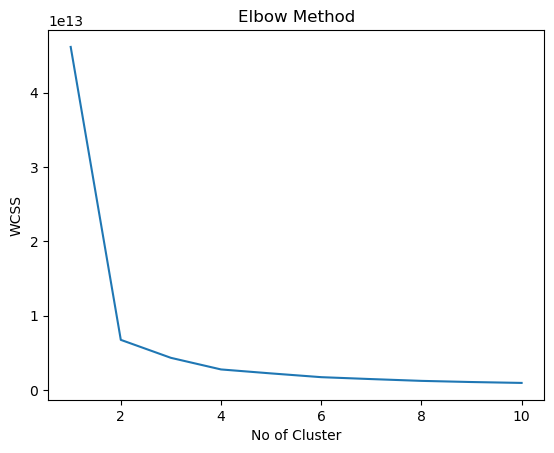

In [43]:
wcss=[] #within cluster sum of square distance
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('No of Cluster')
plt.ylabel("WCSS")
plt.show()

In [44]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state = 42)

In [45]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [46]:
y_kmeans = kmeans.fit_predict(df1)

y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
print(kmeans.labels_)

[0 0 0 ... 0 0 0]


In [48]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

In [49]:
# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
df['cluster'] = cluster

In [50]:
#Mean of clusters 1 to 3
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,index,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF OTHERS,...,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
cluster,,,,,,,,,,,,,,,,,,,,,
1,51221.6,2006.6,49.7,43.5,5.4,29.3,0.0,29.3,41.6,10.4,...,93.8,22.0,87.1,3.2,14.3,398.7,10.9,120.6,1157.3,2816.0
2,55591.7,2007.1,3015.1,2751.0,397.6,1657.6,0.1,1657.5,2535.0,679.1,...,4954.5,1425.4,5995.5,182.1,787.1,25708.5,852.9,8091.8,59618.7,164367.7
3,50863.8,2006.6,1204.3,966.4,98.2,769.2,0.1,769.1,1012.4,241.2,...,3025.8,523.9,2186.1,90.8,375.5,11107.7,198.9,2917.7,38709.1,83095.8


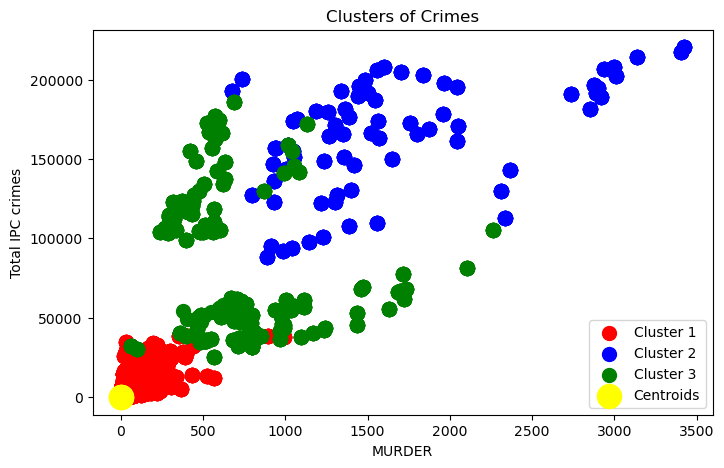

In [54]:
#y_kmeans1
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans1 == 1]['RAPE'], X[y_kmeans1 == 1]['TOTAL IPC CRIMES'], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans1 == 2]['RAPE'], X[y_kmeans1 == 2]['TOTAL IPC CRIMES'], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans1 == 3]['RAPE'], X[y_kmeans1 == 3]['TOTAL IPC CRIMES'], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Crimes')
plt.xlabel('MURDER')
plt.ylabel('Total IPC crimes')
plt.savefig('clusterscatter.jpg')
plt.legend()
plt.show()

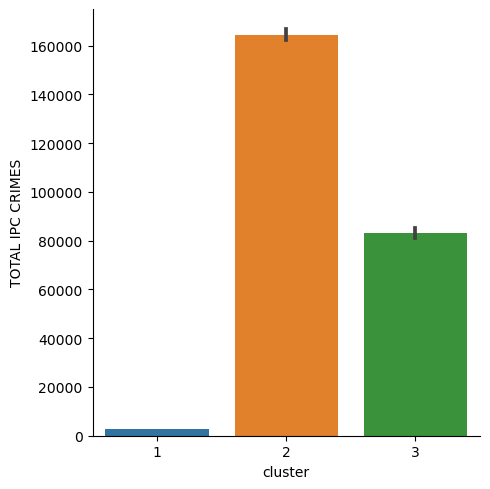

In [55]:
sns.catplot(x='cluster', y='TOTAL IPC CRIMES', data=df, kind='bar');
plt.savefig('clustercatplot.jpg')

<AxesSubplot:xlabel='MURDER', ylabel='ATTEMPT TO MURDER'>

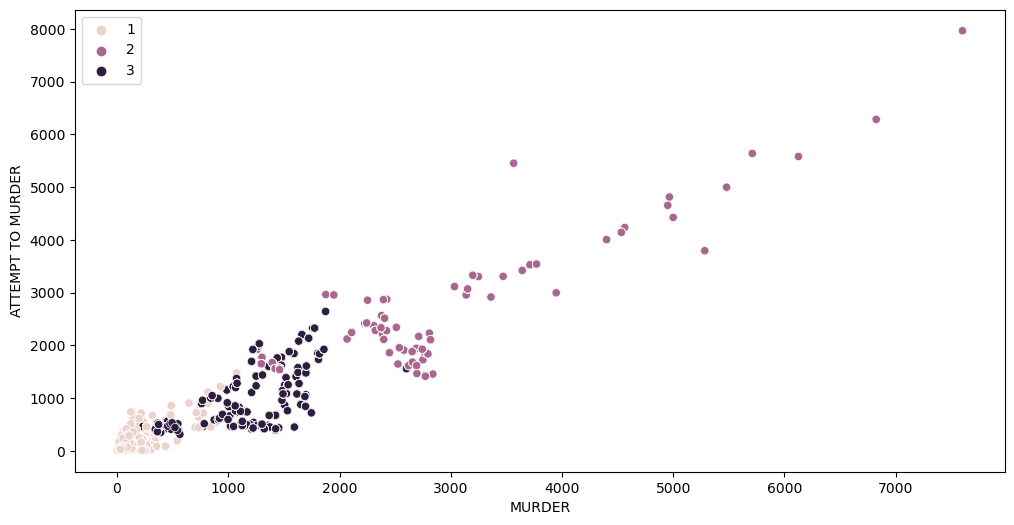

In [56]:
## Plotting scatterplot 

plt.figure(figsize=(12,6))
sns.scatterplot(x=df['MURDER'], y = df['ATTEMPT TO MURDER'],hue=y_kmeans1)

In [57]:
data1=df[df['cluster']==1]
data2=df[df['cluster']==2]
data3=df[df['cluster']==3]

In [58]:
data3.groupby('DISTRICT').max()

,index,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
BANGALORE COMMR.,88069,KARNATAKA,2011,266,460,5,97,0,97,573,...,152,3155,72,7,3153,53,108,10333,32188,3
DELHI UT TOTAL,102062,DELHI UT,2012,565,530,94,706,0,706,3970,...,479,2590,61,79,2011,143,1168,26805,57963,3
TOTAL,99605,WEST BENGAL,2012,2602,2641,581,2263,5,2263,3812,...,1873,10191,599,2830,34947,525,14644,112665,185678,3


In [59]:
data3.groupby('DISTRICT').min()

,index,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
BANGALORE COMMR.,79441,KARNATAKA,2010,232,445,3,65,0,65,513,...,139,3073,60,4,2927,52,104,8297,30283,3
DELHI UT TOTAL,8204,DELHI UT,2001,455,311,63,381,0,381,1156,...,273,1493,33,31,1708,113,252,14055,47404,3
TOTAL,329,ANDHRA PRADESH,2001,343,341,13,236,0,236,162,...,101,424,5,74,2254,15,0,8575,25447,3


In [60]:
sensitivearea=df[df['cluster']==3]

In [61]:
data2.groupby('DISTRICT').max()

,index,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
TOTAL,101959,WEST BENGAL,2012,7601,7964,1616,3425,1,3425,8878,...,4296,19646,478,1288,56768,2322,16076,124176,220335,2


In [62]:
data2.groupby('DISTRICT').min()

,index,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
TOTAL,1373,ANDHRA PRADESH,2001,1259,1412,28,677,0,677,808,...,238,1222,12,170,7544,110,2405,29449,88432,2


In [63]:
data2.shape

(874, 30)

In [64]:
peacefularea=df[df['cluster']==2] 

In [65]:
moderatearea=df[df['cluster']==1] 

In [66]:
data1.groupby('DISTRICT').max()

,index,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
24 PARGANAS NORTH,101663,WEST BENGAL,2012,244,238,241,231,0,231,587,...,259,440,22,41,349,88,113,7918,17412,1
24 PARGANAS SOUTH,101675,WEST BENGAL,2012,263,123,75,308,0,308,419,...,94,250,11,26,390,68,131,7641,15299,1
A and N ISLANDS,58821,A & N ISLANDS,2007,15,19,1,3,0,3,12,...,7,23,1,11,99,1,4,337,807,1
ADILABAD,93529,ANDHRA PRADESH,2012,113,94,17,88,0,88,96,...,36,216,7,45,2172,22,400,2265,6122,1
AGRA,100626,UTTAR PRADESH,2012,181,190,55,76,0,76,395,...,166,386,58,19,573,88,591,2509,10290,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOKHA,98891,NAGALAND,2012,12,7,1,3,0,3,4,...,2,2,2,6,10,0,4,24,99,1
YADGIRI,97071,KARNATAKA,2012,26,51,0,9,0,9,26,...,2,36,3,27,353,3,135,613,1592,1
YAMUNANAGAR,95882,HARYANA,2012,50,56,5,36,0,36,83,...,17,83,4,12,235,13,10,960,2282,1


In [67]:
data1.groupby('DISTRICT').min()

,index,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
24 PARGANAS NORTH,7815,WEST BENGAL,2001,140,6,38,53,0,53,81,...,5,35,3,0,0,23,0,3036,6167,1
24 PARGANAS SOUTH,7827,WEST BENGAL,2001,107,2,25,47,0,47,53,...,0,4,1,6,0,43,0,3211,5827,1
A and N ISLANDS,58821,A & N ISLANDS,2007,15,19,1,3,0,3,12,...,7,23,1,11,99,1,4,337,807,1
ADILABAD,0,ANDHRA PRADESH,2001,73,39,8,35,0,35,41,...,11,104,0,17,1044,5,181,881,4154,1
AGRA,6786,UTTAR PRADESH,2001,109,116,18,26,0,26,99,...,83,122,3,4,360,38,40,896,3438,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOKHA,5105,NAGALAND,2001,1,2,0,0,0,0,0,...,0,0,0,0,2,0,0,4,47,1
YADGIRI,79811,KARNATAKA,2010,23,21,0,5,0,5,20,...,0,24,0,5,289,0,5,449,1486,1
YAMUNANAGAR,2245,HARYANA,2001,21,14,0,12,0,12,15,...,1,18,0,3,112,4,0,585,1283,1


In [68]:
kmeans.cluster_centers_

array([[-1.23093692e-03, -1.25662906e-01, -1.17725610e-01,
        -7.70010582e-02, -1.26323299e-01, -2.42412445e-02,
        -1.26319290e-01, -1.12200095e-01, -1.08132386e-01,
        -1.10305390e-01, -7.74245253e-02, -1.18433667e-01,
        -1.20417994e-01, -1.23149454e-01, -1.12867181e-01,
        -1.21737542e-01, -1.19786960e-01, -1.09759617e-01,
        -1.06706376e-01, -1.05664425e-01, -1.16745751e-01,
        -1.19697887e-01, -9.99761873e-02, -1.13117616e-01,
        -1.27670518e-01, -1.34373284e-01],
       [ 1.41175661e-01,  8.70855657e+00,  8.58753021e+00,
         6.33258546e+00,  8.20319905e+00,  9.90365500e-01,
         8.20329305e+00,  7.77565096e+00,  7.85072786e+00,
         6.58625720e+00,  3.39401565e+00,  7.93124496e+00,
         7.88408093e+00,  8.28947066e+00,  7.36383116e+00,
         8.33169417e+00,  6.79717893e+00,  7.86350668e+00,
         7.66423150e+00,  6.63532705e+00,  7.48736457e+00,
         8.01578526e+00,  8.35610413e+00,  8.16264760e+00,
         7.01

In [69]:
## Defining the countplot function for each cluster   for STATE/UT, YEAR,DISTRICT clumns for each cluster
def generate_countplot(x):
    plt.figure(figsize=(10,7))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

col1 = ['STATE/UT', 'YEAR']

Countplot for STATE/UT column:->


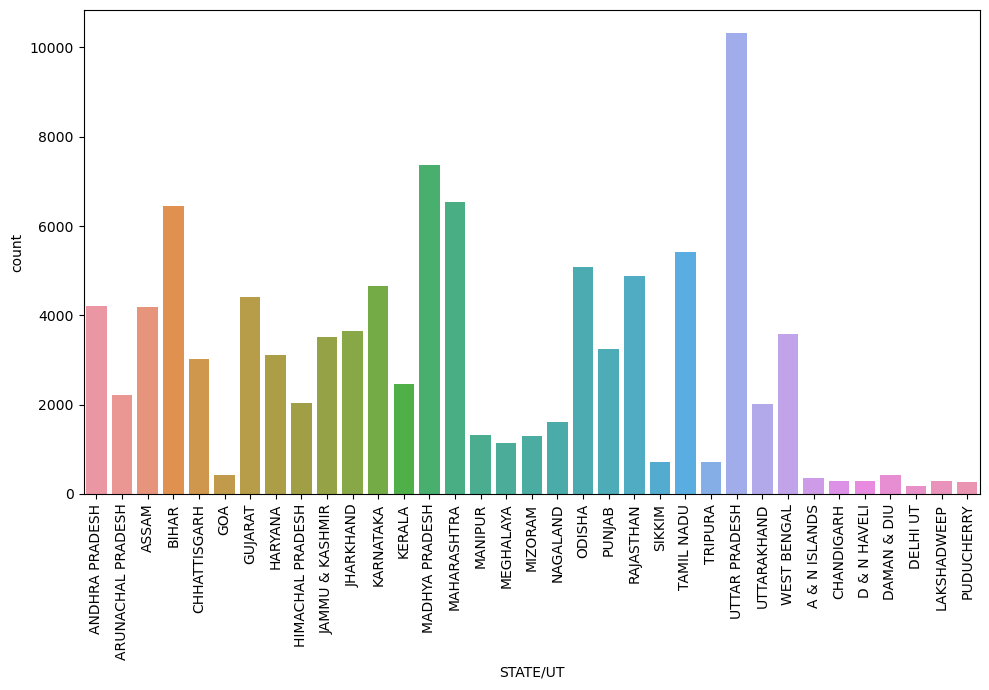

Countplot for YEAR column:->


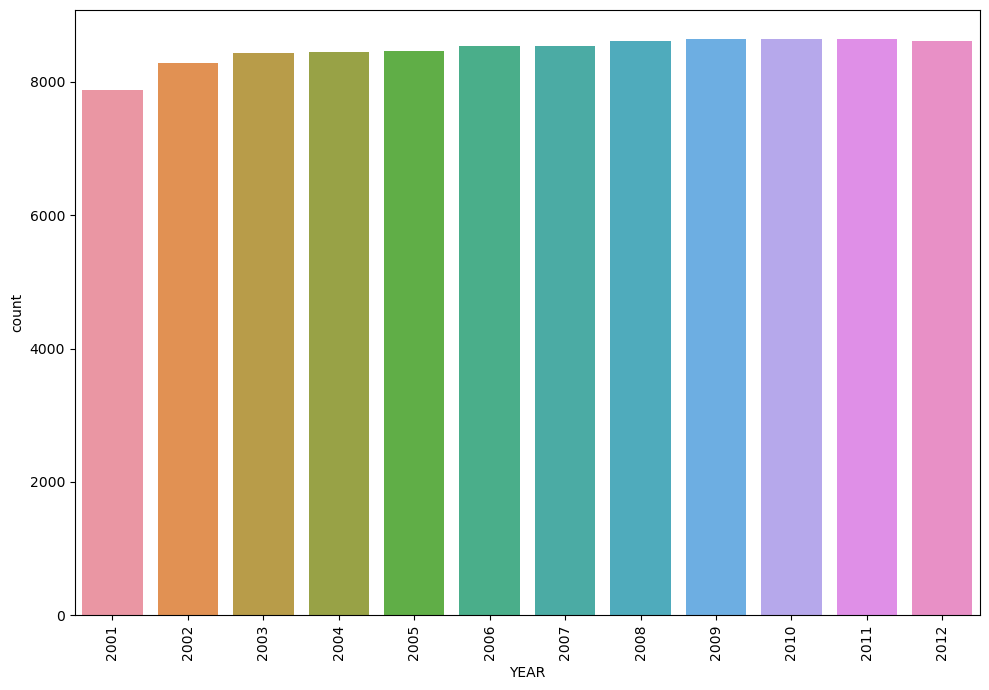

In [70]:
for i in sensitivearea[col1]:
    print("Countplot for {} column:->".format(i))
    generate_countplot(df[i])

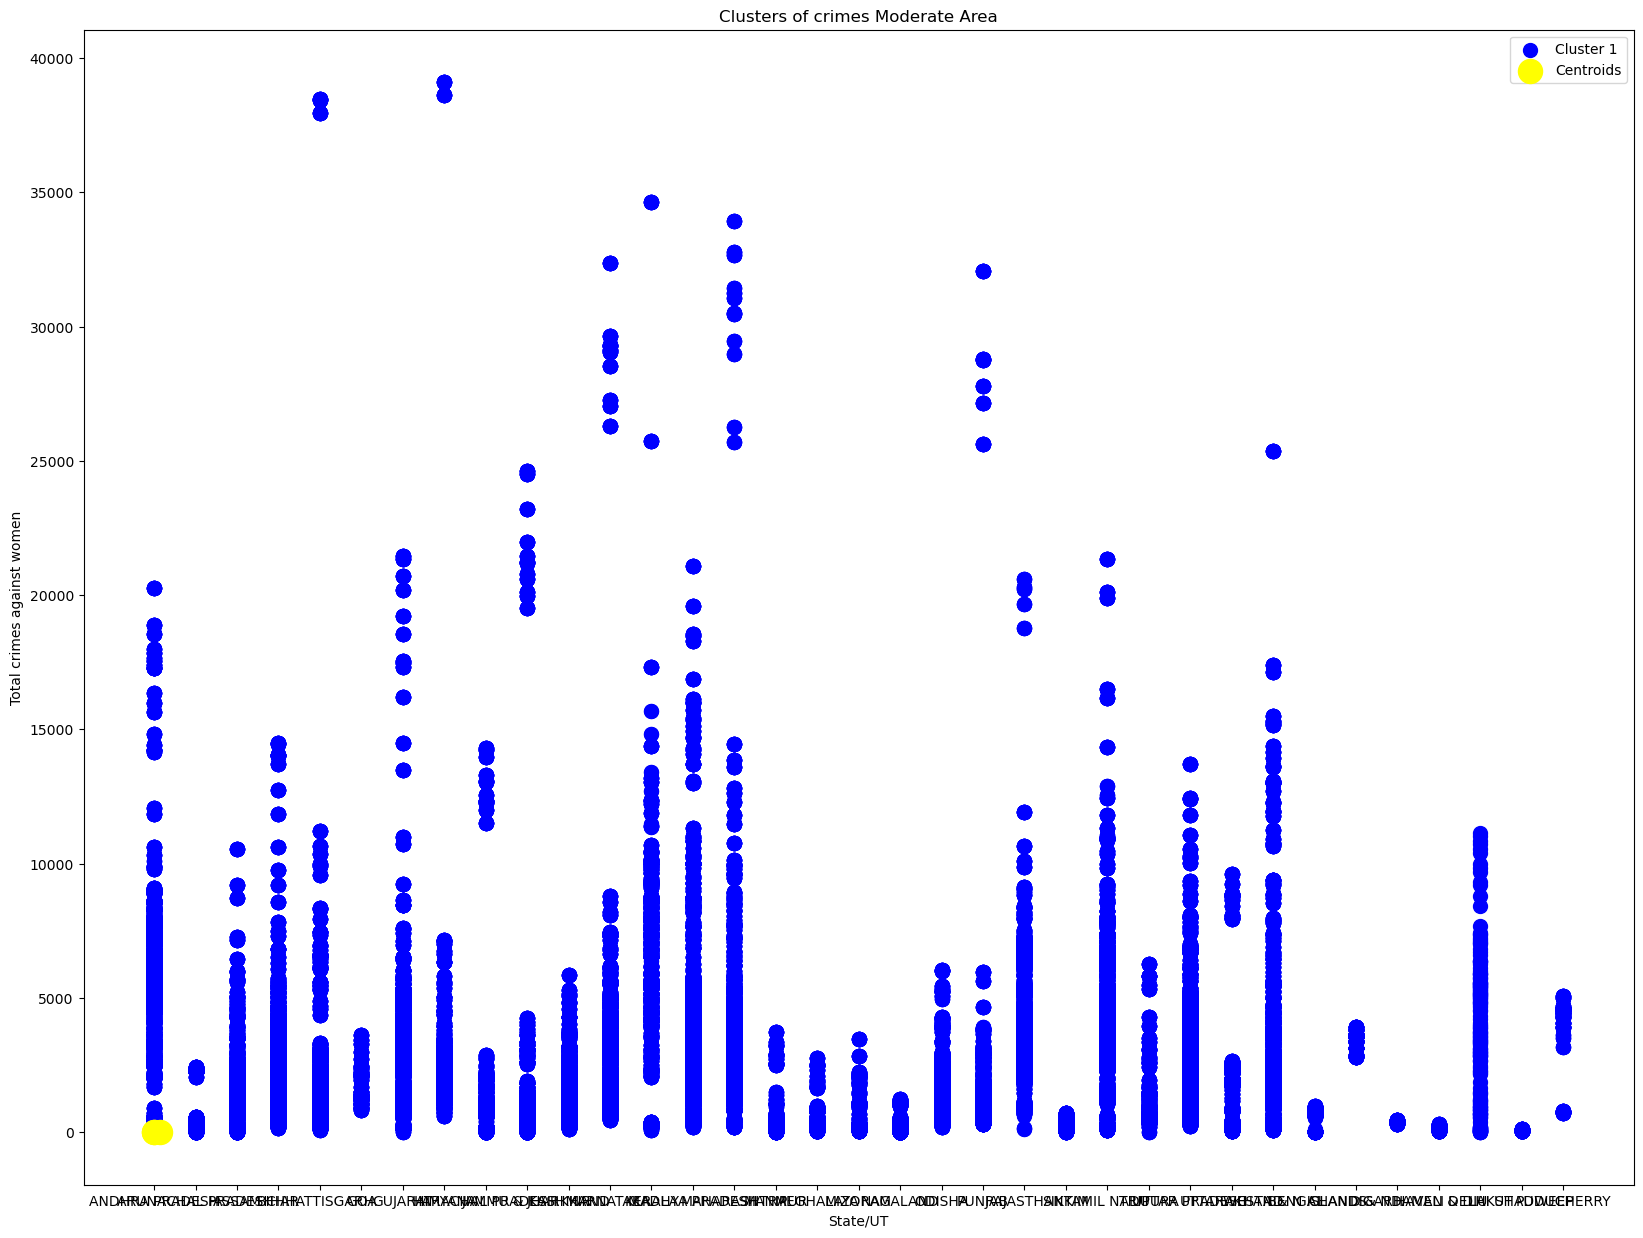

In [71]:
plt.figure(figsize=(20,15))
plt.scatter(moderatearea['STATE/UT'], moderatearea['TOTAL IPC CRIMES'], s = 100, c = 'blue', label = 'Cluster 1'),#hue=data2['STATE/UT'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of crimes Moderate Area')
plt.xlabel('State/UT')
plt.ylabel('Total crimes against women')
plt.legend()
plt.show()


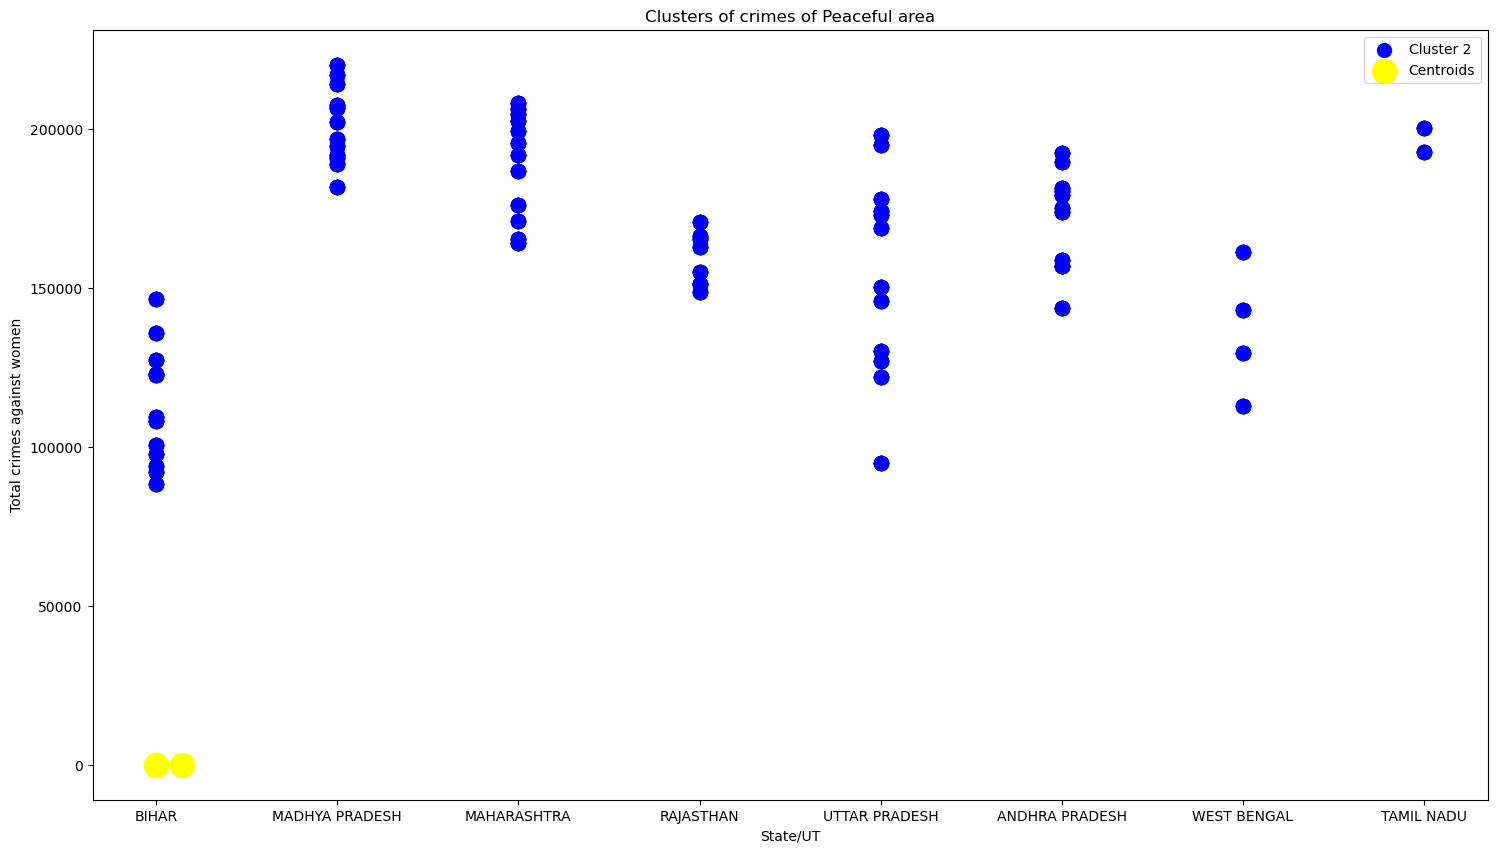

In [72]:
plt.figure(figsize=(18,10))
plt.scatter(peacefularea['STATE/UT'], peacefularea['TOTAL IPC CRIMES'], s = 100, c = 'blue', label = 'Cluster 2'),#hue=data2['STATE/UT'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of crimes of Peaceful area')
plt.xlabel('State/UT')
plt.ylabel('Total crimes against women')
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import silhouette_score

In [76]:
pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)
#Pivot table representation of a particular crime by 'Year' and 'State' features

ARSON  ATTEMPT TO MURDER  AUTO THEFT  BURGLARY  \
STATE/UT       DISTRICT YEAR                                                   
ANDHRA PRADESH TOTAL    2001    872               1555        3051      7220   
ASSAM          TOTAL    2001    441                481         350      2423   
                        2002    438                479         496      2504   
                        2003    677                485         406      2606   
                        2004    379                410         685      2544   
...                             ...                ...         ...       ...   
WEST BENGAL    TOTAL    2004    103                390        2668       547   
                        2005     92                434        2435       739   
                        2006    111                672        2714       601   
                        2007    121                877        2421       399   
                        2008    150               1732        2593       462   

                              CAUSING DEATH BY NEGLIGENCE  CHEATING  \
STATE/UT       DISTRICT YEAR                                          
ANDHRA PRADESH TOTAL    2001                         7400      5391   
ASSAM          TOTAL    2001                         2010       575   
                        2002                         1957       719   
                        2003                         2086       894   
                        2004                         2239       865   
...                                                   ...       ...   
WEST BENGAL    TOTAL    2004                         2995      1686   
                        2005                         2737      1760   
                        2006                         3039      1947   
                        2007                         3803      2406   
                        2008                         3789      2938   

                              COUNTERFIETING  CRIMINAL BREACH OF TRUST  \
STATE/UT       DISTRICT YEAR                                             
ANDHRA PRADESH TOTAL    2001             144                       788   
ASSAM          TOTAL    2001              46                       374   
                        2002              57                       558   
                        2003              58                       611   
                        2004              57                       586   
...                                      ...                       ...   
WEST BENGAL    TOTAL    2004             125                       425   
                        2005             107                       528   
                        2006             135                       519   
                        2007             127                       672   
                        2008             148                       876   

                              CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
STATE/UT       DISTRICT YEAR                                              
ANDHRA PRADESH TOTAL    2001                                        136   
ASSAM          TOTAL    2001                                         40   
                        2002                                         55   
                        2003                                         48   
                        2004                                         63   
...                                                                 ...   
WEST BENGAL    TOTAL    2004                                        468   
                        2005                                        408   
                        2006                                        401   
                        2007                                        394   
                        2008                                        488   

                              CUSTODIAL RAPE  ...  MURDER  OTHER IPC CRIMES  \
STATE/UT       DISTRICT YEAR                  .

In [77]:
print("We have {} Rows and {} Columns in our dataframe Sensitive Area ".format(sensitivearea.shape[0], sensitivearea.shape[1]))


We have 1471 Rows and 30 Columns in our dataframe Sensitive Area 


In [84]:
tot_murder= sensitivearea['MURDER'].sum()
tot_rape= sensitivearea['RAPE'].sum()
tot_dowrydeaths = sensitivearea['DOWRY DEATHS'].sum()

tot_riots=sensitivearea['RIOTS'].sum()
tot_kidnap= sensitivearea['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= sensitivearea['DACOITY'].sum()
tot_robbery = sensitivearea['ROBBERY'].sum()
tot_burglary= sensitivearea['BURGLARY'].sum()
tot_theft= sensitivearea['THEFT'].sum()



crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots',]
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,
          tot_theft,tot_riots]

colors = ['crimson','gold','green','yellow','blue','black']

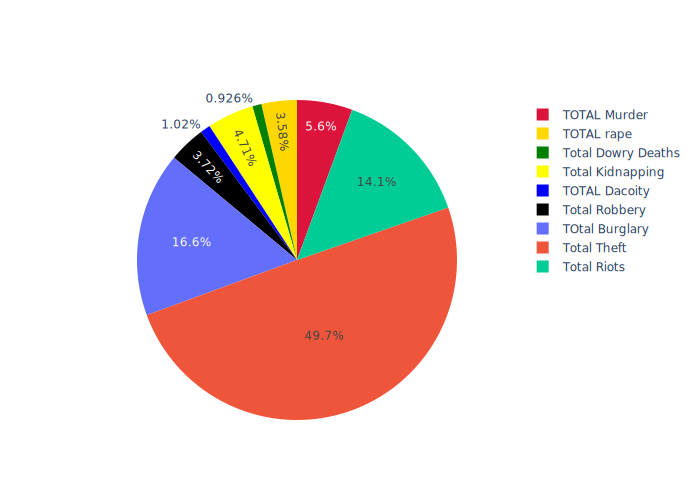

In [85]:
fig = go.Figure(data=[go.Pie(labels=crime_group, values=values,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show(renderer='svg')

In [86]:
sensitivearea['STATE/UT'].value_counts()

KARNATAKA         168
ASSAM             144
GUJARAT           144
JHARKHAND         143
KERALA            143
ODISHA            142
HARYANA           120
TAMIL NADU        119
CHHATTISGARH      108
WEST BENGAL        96
PUNJAB             72
RAJASTHAN          48
ANDHRA PRADESH     12
DELHI UT           12
Name: STATE/UT, dtype: int64

In [87]:
sensitivearea['DISTRICT'].value_counts()

TOTAL               1435
BANGALORE COMMR.      24
DELHI UT TOTAL        12
Name: DISTRICT, dtype: int64

In [88]:
sensitivearea_dis=sensitivearea.groupby('DISTRICT')

In [89]:
sensitivearea_dis.first()

,index,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
BANGALORE COMMR.,79441,KARNATAKA,2010,266,445,5,65,0,65,513,...,139,3073,72,7,3153,52,104,10333,32188,3
DELHI UT TOTAL,8204,DELHI UT,2001,547,510,63,381,0,381,1627,...,479,2183,42,50,2011,113,432,22000,54384,3
TOTAL,329,ANDHRA PRADESH,2001,2602,1555,136,871,0,871,1182,...,788,5391,144,872,34947,420,7400,34344,130089,3


In [90]:
sensitivearea.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1471.0,50863.787899,28482.441733,329.0,27063.5,52132.0,74660.5,102062.0
YEAR,1471.0,2006.567641,3.360335,2001.0,2004.0,2007.0,2009.0,2012.0
MURDER,1471.0,1204.259687,428.168813,232.0,991.0,1214.0,1519.0,2602.0
ATTEMPT TO MURDER,1471.0,966.410605,554.914244,311.0,480.0,759.0,1372.0,2641.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,1471.0,98.178110,115.237812,3.0,35.0,63.0,100.0,581.0
RAPE,1471.0,769.201903,404.926743,65.0,480.0,686.0,993.0,2263.0
CUSTODIAL RAPE,1471.0,0.130523,0.663396,0.0,0.0,0.0,0.0,5.0
OTHER RAPE,1471.0,769.071380,404.867634,65.0,480.0,686.0,993.0,2263.0
KIDNAPPING & ABDUCTION,1471.0,1012.355540,698.185581,162.0,522.5,879.0,1349.0,3970.0
KIDNAPPING AND ABDUCTION OF OTHERS,1471.0,241.239973,157.128628,40.0,131.0,213.0,293.0,1810.0


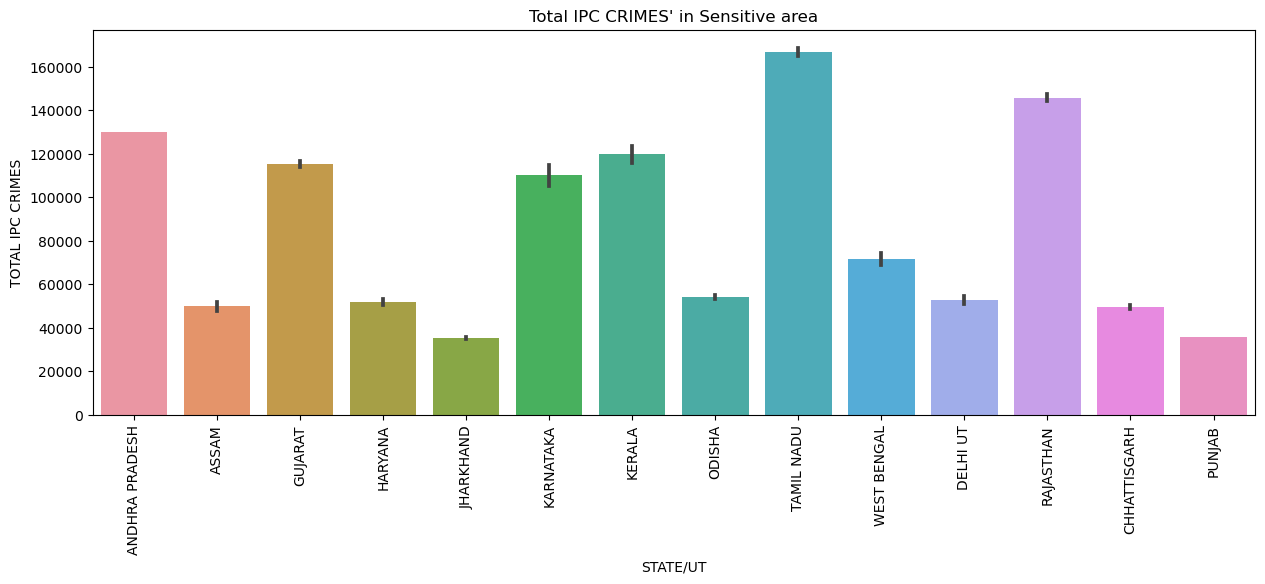

In [91]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=sensitivearea)
plt.xticks(rotation='90')
plt.title("Total IPC CRIMES' in Sensitive area")
plt.show()

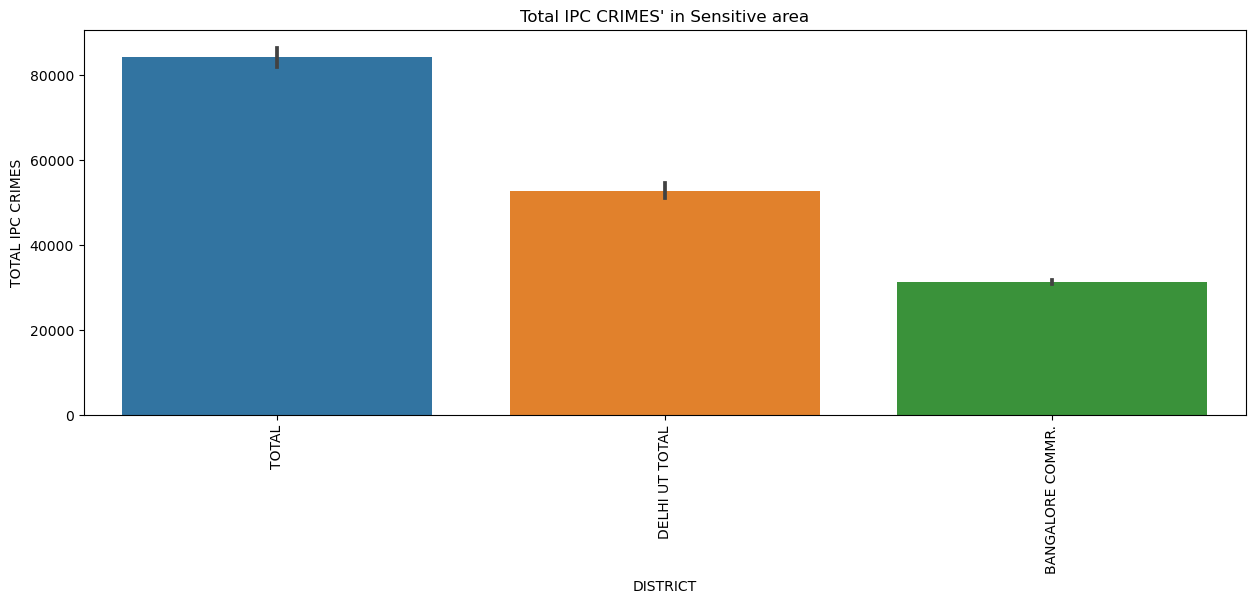

In [92]:
plt.figure(figsize=(15, 5))
sns.barplot(x='DISTRICT', y='TOTAL IPC CRIMES',data=sensitivearea)
plt.xticks(rotation='90')
plt.title("Total IPC CRIMES' in Sensitive area")
plt.savefig('IPC CRIMES in Sensitive area.jpg')
plt.show()

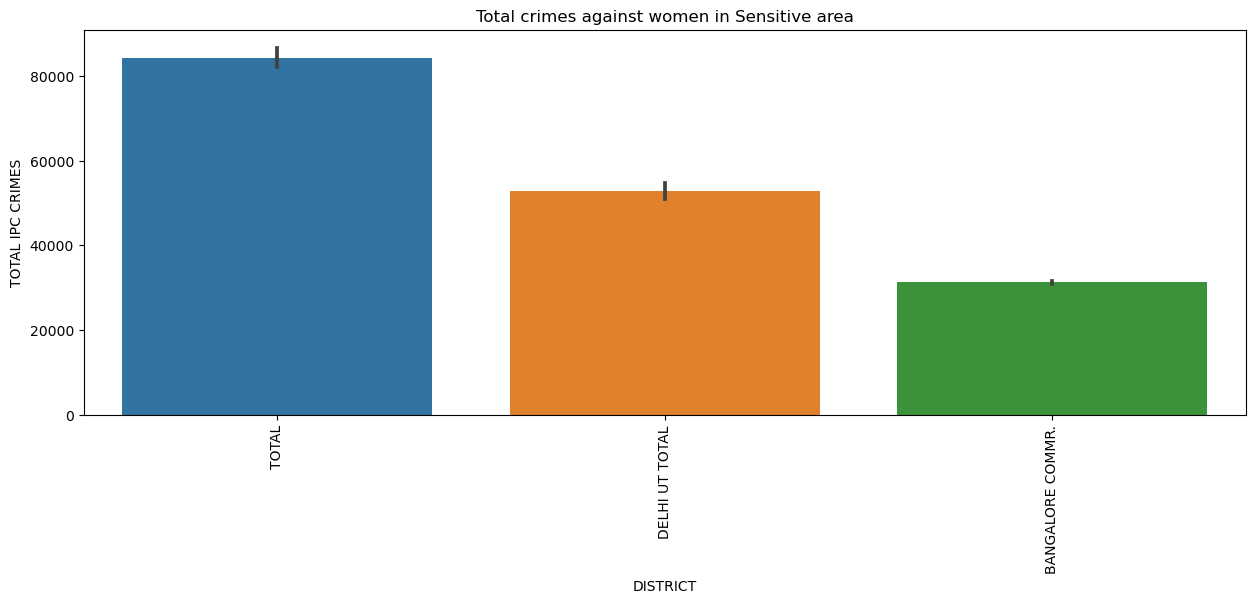

In [94]:
plt.figure(figsize=(15, 5))
sns.barplot(x='DISTRICT', y='TOTAL IPC CRIMES',data=sensitivearea)
plt.xticks(rotation='90')
plt.title("Total crimes against women in Sensitive area")

plt.savefig('Total crimes against women in Sensitive area.jpg')
plt.show()

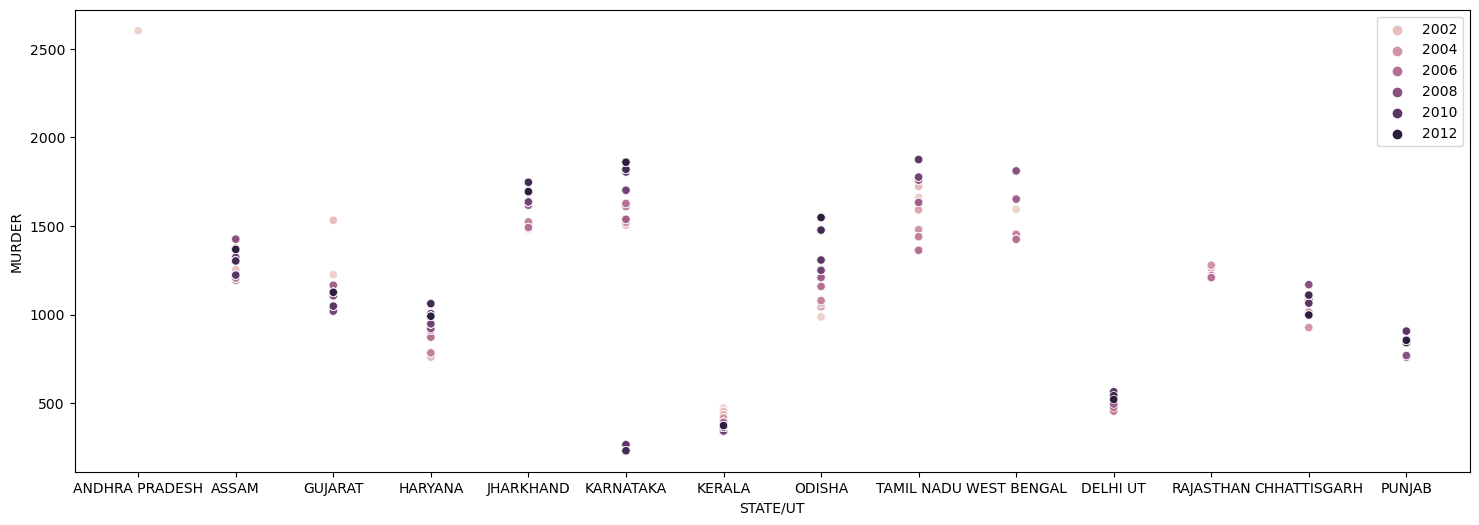

In [96]:
plt.figure(figsize=(18,6))
sns.scatterplot(x = "STATE/UT", y = "MURDER", data = sensitivearea,hue='YEAR')
plt.legend()
#plt.tight_layout()
plt.show()

Text(0, 0.5, 'Cases of INSULT TO MODESTY OF WOMEN in India')

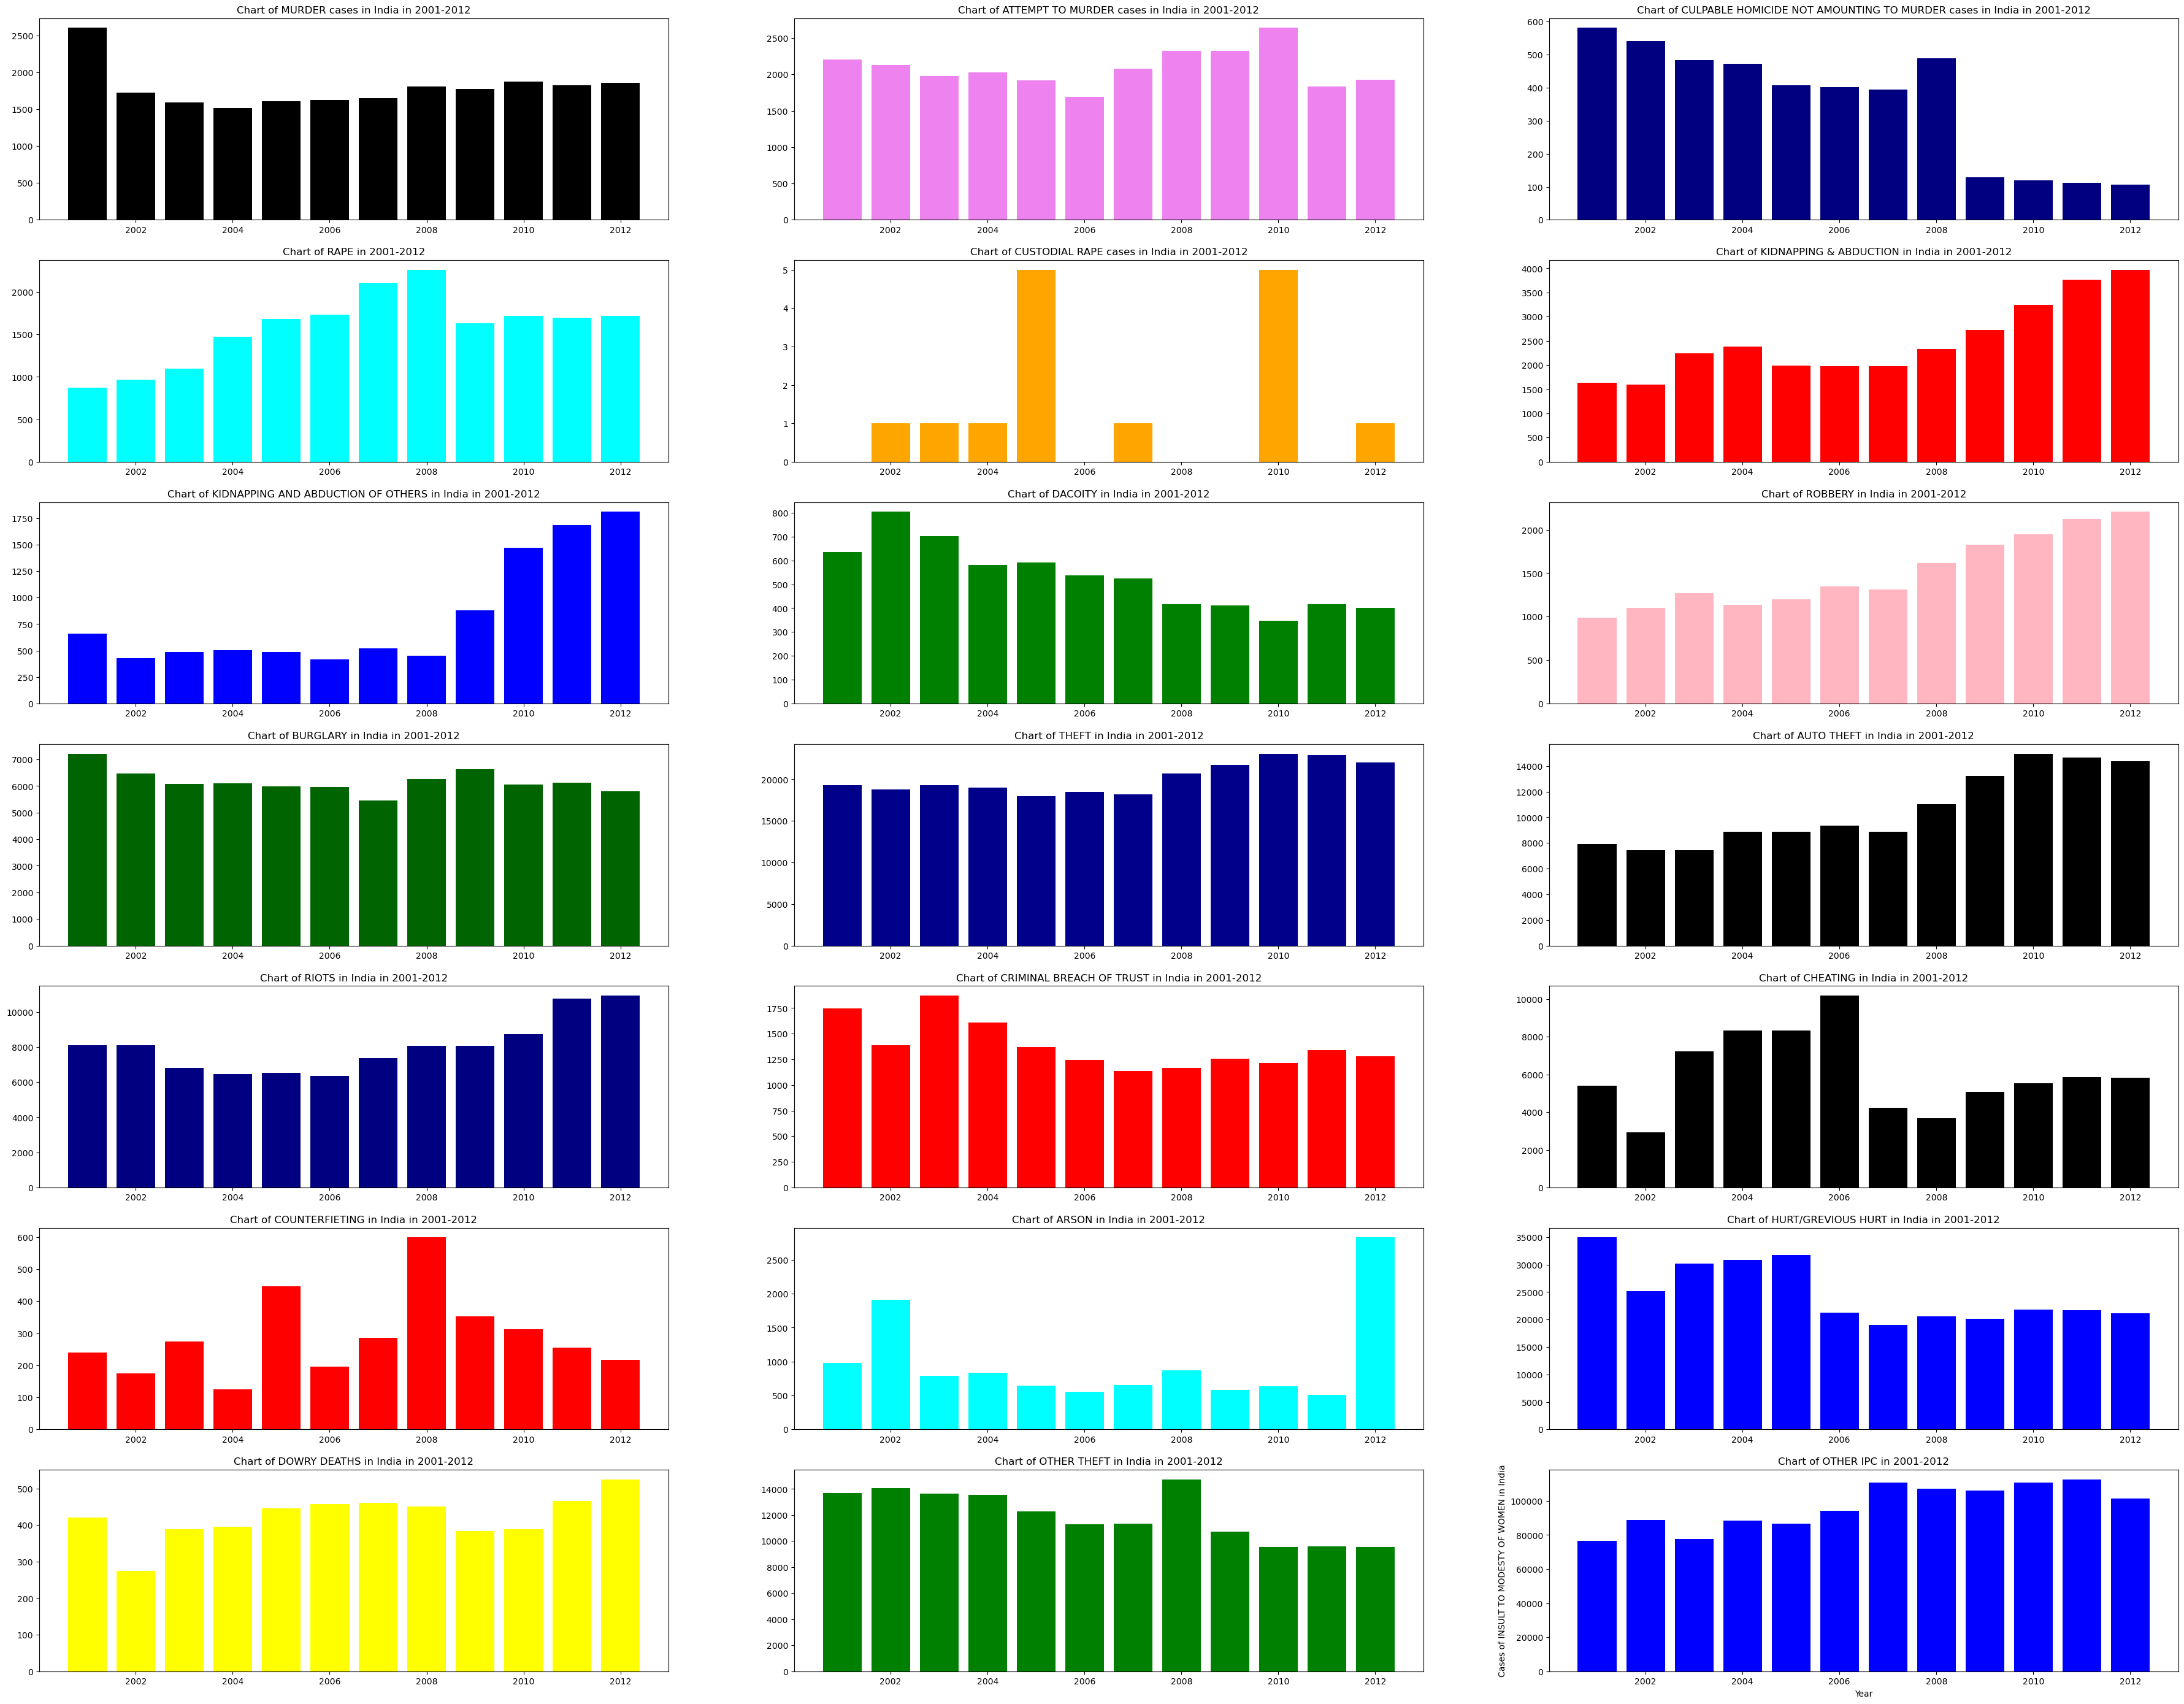

In [99]:
fig, axes = plt.subplots(7, 3, figsize=(45, 35))

axes[0,0].set_title("Chart of MURDER cases in India in 2001-2012")
axes[0,0].bar(sensitivearea['YEAR'], sensitivearea['MURDER'], color = 'black');
plt.xlabel('YEAR') #X-axis
plt.ylabel('Cases of MURDER in India') #Y-axis

axes[0,1].set_title("Chart of ATTEMPT TO MURDER cases in India in 2001-2012")
axes[0,1].bar(sensitivearea['YEAR'], sensitivearea['ATTEMPT TO MURDER'], color = 'violet');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ATTEMPT TO MURDER in India') #Y-axis

axes[0,2].set_title("Chart of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER cases in India in 2001-2012")
axes[0,2].bar(sensitivearea['YEAR'], sensitivearea['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'], color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER in India') #Y-axis

axes[1,0].set_title("Chart of RAPE in 2001-2012")
axes[1,0].bar(sensitivearea['YEAR'], sensitivearea['RAPE'], color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of RAPE in India') #Y-axis

axes[1,1].set_title("Chart of CUSTODIAL RAPE cases in India in 2001-2012")
axes[1,1].bar(sensitivearea['YEAR'], sensitivearea['CUSTODIAL RAPE'], color = 'orange');
plt.xlabel('YEAR') #X-axis
plt.ylabel('Cases of CUSTODIAL RAPE in India') #Y-axis

axes[1,2].set_title("Chart of KIDNAPPING & ABDUCTION in India in 2001-2012")
axes[1,2].bar(sensitivearea['YEAR'], sensitivearea['KIDNAPPING & ABDUCTION'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of KIDNAPPING & ABDUCTION in India') #Y-axis
axes[2,0].set_title("Chart of KIDNAPPING AND ABDUCTION OF OTHERS in India in 2001-2012")
axes[2,0].bar(sensitivearea['YEAR'], sensitivearea['KIDNAPPING AND ABDUCTION OF OTHERS'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of KIDNAPPING AND ABDUCTION OF OTHERSin India') #Y-axis


axes[2,1].set_title("Chart of DACOITY in India in 2001-2012")
axes[2,1].bar(sensitivearea['YEAR'], sensitivearea['DACOITY'], color = 'green');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of DACOITY in India') #Y-axis

axes[2,2].set_title("Chart of ROBBERY in India in 2001-2012")
axes[2,2].bar(sensitivearea['YEAR'], sensitivearea['ROBBERY'], color = 'lightpink');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ROBBERY in India') #Y-axis

axes[3,0].set_title("Chart of BURGLARY in India in 2001-2012")
axes[3,0].bar(sensitivearea['YEAR'], sensitivearea['BURGLARY'], color = 'darkgreen');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of BURGLARY in India') #Y-axis


axes[3,1].set_title("Chart of THEFT in India in 2001-2012")
axes[3,1].bar(sensitivearea['YEAR'], sensitivearea['THEFT'], color = 'darkblue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of THEFT in India') #Y-axis



axes[3,2].set_title("Chart of AUTO THEFT in India in 2001-2012")
axes[3,2].bar(sensitivearea['YEAR'], sensitivearea['AUTO THEFT'], color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of AUTO THEFT in India') #Y-axis

axes[4,0].set_title("Chart of RIOTS in India in 2001-2012")
axes[4,0].bar(sensitivearea['YEAR'], sensitivearea['RIOTS'], color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of RIOTS') #Y-axis

axes[4,1].set_title("Chart of CRIMINAL BREACH OF TRUST in India in 2001-2012")
axes[4,1].bar(sensitivearea['YEAR'], sensitivearea['CRIMINAL BREACH OF TRUST'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CRIMINAL BREACH OF TRUST in India') #Y-axis


axes[4,2].set_title("Chart of CHEATING in India in 2001-2012")
axes[4,2].bar(sensitivearea['YEAR'], sensitivearea['CHEATING'], color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CHEATING in India') #Y-axis

axes[5,0].set_title("Chart of COUNTERFIETING in India in 2001-2012")
axes[5,0].bar(sensitivearea['YEAR'], sensitivearea['COUNTERFIETING'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of COUNTERFIETING in India') #Y-axis

axes[5,1].set_title("Chart of ARSON in India in 2001-2012")
axes[5,1].bar(sensitivearea['YEAR'], sensitivearea['ARSON'], color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ARSON in India') #Y-axis


axes[5,2].set_title("Chart of HURT/GREVIOUS HURT in India in 2001-2012")
axes[5,2].bar(sensitivearea['YEAR'], sensitivearea['HURT/GREVIOUS HURT'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of HURT/GREVIOUS HURT in India') #Y-axis
axes[6,0].set_title("Chart of DOWRY DEATHS in India in 2001-2012")
axes[6,0].bar(sensitivearea['YEAR'], sensitivearea['DOWRY DEATHS'], color = 'yellow');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of DOWRY DEATHS in India') #Y-axis

axes[6,1].set_title("Chart of OTHER THEFT in India in 2001-2012")
axes[6,1].bar(sensitivearea['YEAR'], sensitivearea['OTHER THEFT'], color = 'green');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of OTHER THEFT in India') #Y-axis

axes[6,2].set_title("Chart of OTHER IPC in 2001-2012")
axes[6,2].bar(sensitivearea['YEAR'], sensitivearea['OTHER IPC CRIMES'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of INSULT TO MODESTY OF WOMEN in India') #Y-axis

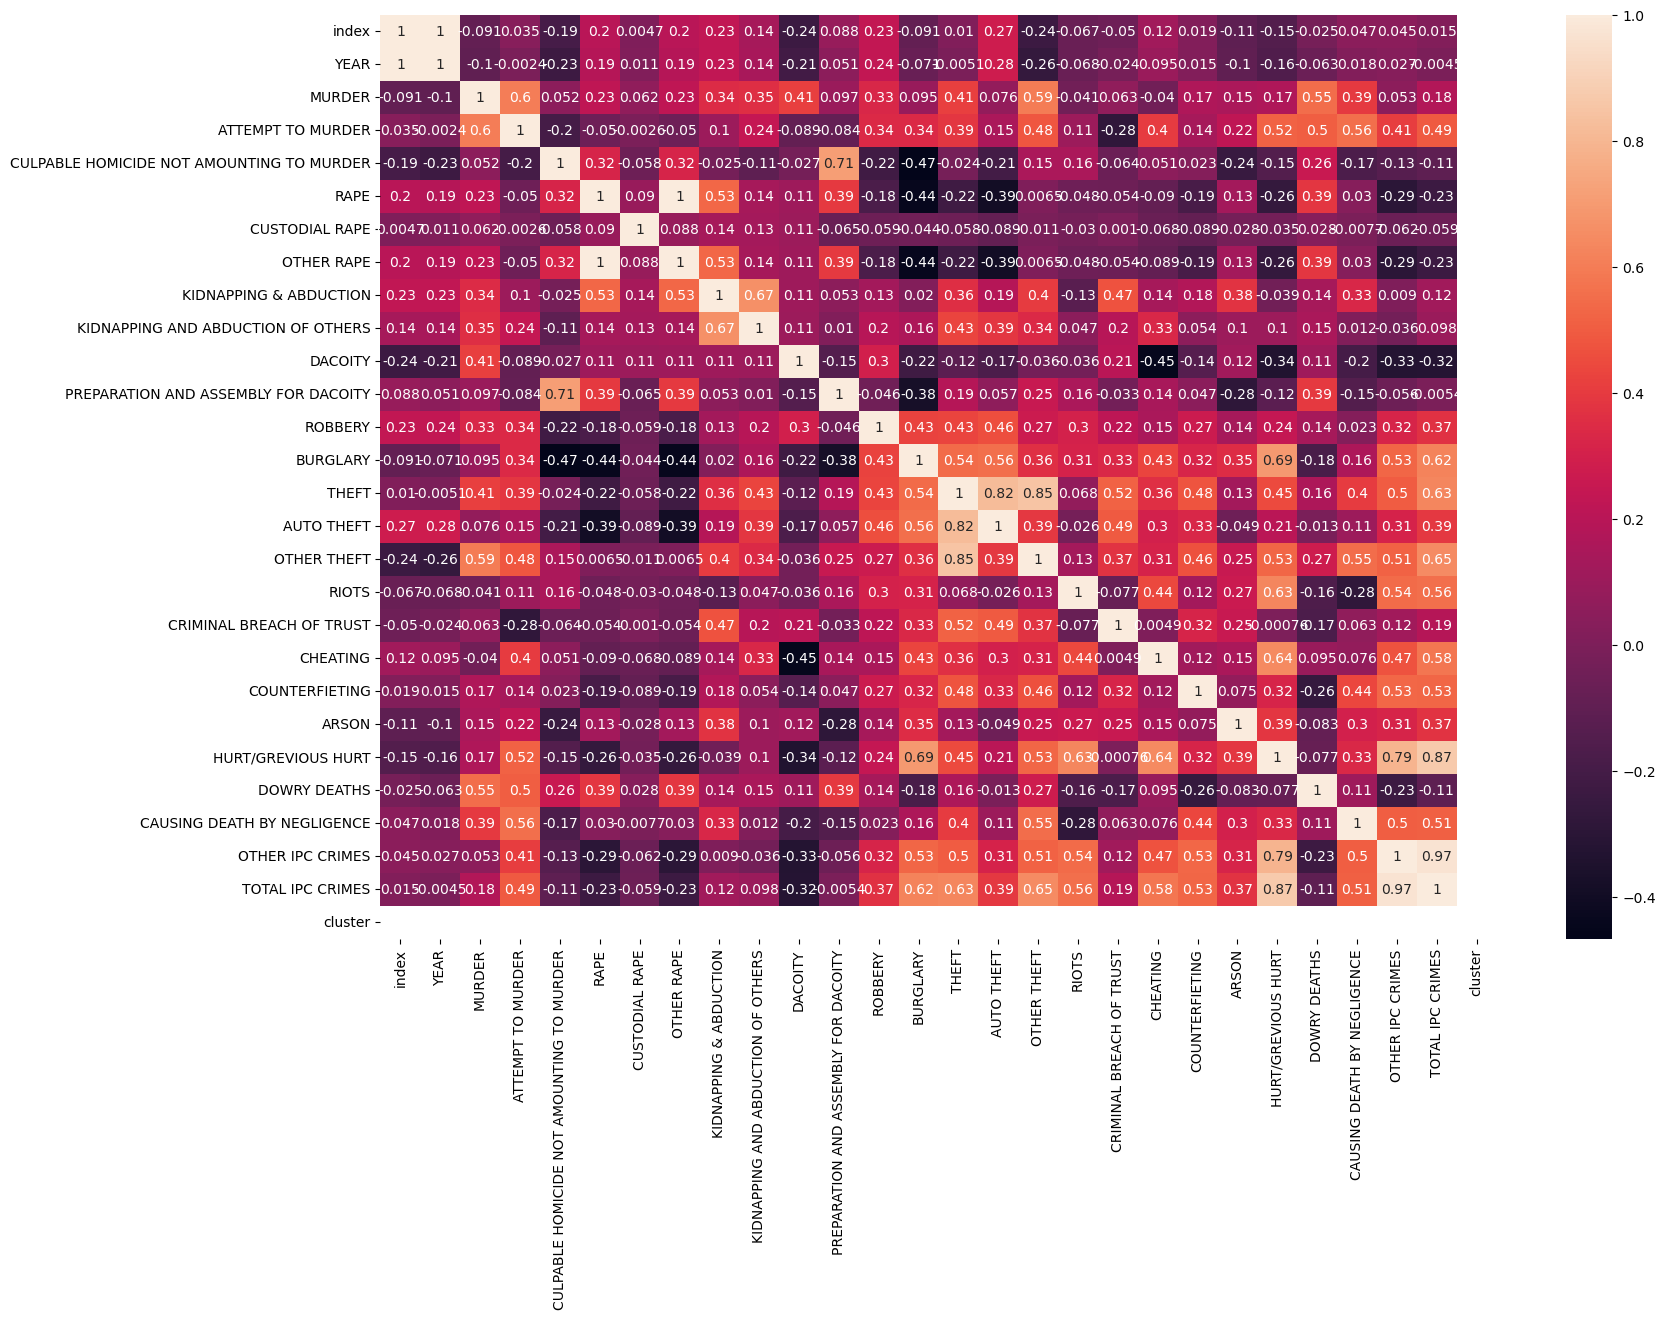

In [100]:
plt.figure(figsize=(18,12))
sns.heatmap(sensitivearea.corr(),annot=True)
plt.savefig('heatmap2.jpg')
plt.show()

In [102]:
pd.pivot_table(moderatearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)
#Pivot table representation of a particular crime by 'Year' and 'State' features

ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT      DISTRICT        YEAR                                         
A & N ISLANDS A and N ISLANDS 2007     11                 19           8   
              ANDAMAN         2001      4                  0           4   
                              2002      2                  3           2   
                              2003      7                  4           3   
                              2004      8                  1           9   
...                                   ...                ...         ...   
WEST BENGAL   UTTAR DINAJPUR  2008     17                 98          53   
                              2009     11                 86          89   
                              2010     10                106         114   
                              2011     20                178         119   
                              2012     33                283         129   

                                    BURGLARY  CAUSING DEATH BY NEGLIGENCE  \
STATE/UT      DISTRICT        YEAR                                          
A & N ISLANDS A and N ISLANDS 2007        90                            4   
              ANDAMAN         2001        62                            0   
                              2002        47                            0   
                              2003        56                            0   
                              2004        67                            6   
...                                      ...                          ...   
WEST BENGAL   UTTAR DINAJPUR  2008        10                            5   
                              2009         8                            2   
                              2010         4                            2   
                              2011        10                            7   
                              2012         7                            3   

                                    CHEATING  COUNTERFIETING  \
STATE/UT      DISTRICT        YEAR                             
A & N ISLANDS A and N ISLANDS 2007        23               1   
              ANDAMAN         2001         8               2   
                              2002        11               0   
                              2003        13               0   
                              2004        11               0   
...                                      ...             ...   
WEST BENGAL   UTTAR DINAJPUR  2008        20              10   
                              2009        40               6   
                              2010        34               2   
                              2011        33               3   
                              2012        64               6   

                                    CRIMINAL BREACH OF TRUST  \
STATE/UT      DISTRICT        YEAR                             
A & N ISLANDS A and N ISLANDS 2007                         7   
              ANDAMAN         2001                        10   
                              2002                         4   
                              2003                         1   
                              2004                         0   
...                                                      ...   
WEST BENGAL   UTTAR DINAJPUR  2008                        14   
                              2009                         9   
                              2010                         9   
                              2011                        16   
                              2012                        18   

                                    CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
STATE/UT      DISTRICT        YEAR                                              
A & N ISLANDS A and N ISLANDS 2007                                          1   
              ANDAMAN         2001                                          0   
                              2002                     

In [103]:
print("We have {} Rows and {} Columns in our dataframe Moderate Area ".format(moderatearea.shape[0], moderatearea.shape[1]))

We have 99361 Rows and 30 Columns in our dataframe Moderate Area 


In [104]:
moderatearea['STATE/UT'].value_counts()

UTTAR PRADESH        10178
MADHYA PRADESH        7232
MAHARASHTRA           6383
BIHAR                 6314
TAMIL NADU            5286
ODISHA                4931
RAJASTHAN             4731
KARNATAKA             4487
GUJARAT               4268
ANDHRA PRADESH        4074
ASSAM                 4037
JAMMU & KASHMIR       3524
JHARKHAND             3513
WEST BENGAL           3430
PUNJAB                3179
HARYANA               2981
CHHATTISGARH          2909
KERALA                2312
ARUNACHAL PRADESH     2225
HIMACHAL PRADESH      2040
UTTARAKHAND           2011
NAGALAND              1609
MANIPUR               1321
MIZORAM               1292
MEGHALAYA             1148
TRIPURA                727
SIKKIM                 719
GOA                    430
DAMAN & DIU            425
A & N ISLANDS          348
CHANDIGARH             287
D & N HAVELI           287
LAKSHADWEEP            287
PUDUCHERRY             266
DELHI UT               170
Name: STATE/UT, dtype: int64

In [105]:
moderatearea['DISTRICT'].value_counts()

TOTAL              2568
G.R.P.              512
RAILWAYS            408
NORTH               301
SOUTH               301
                   ... 
A and N ISLANDS       1
RAILWAYS KMR          1
CRIME KASHMIR         1
G.R.P. AJMER          1
CAR                   1
Name: DISTRICT, Length: 807, dtype: int64

In [106]:
moderatearea.describe().T

,count,mean,std,min,25%,50%,75%,max
index,99361.0,51221.582925,29390.024955,0.0,25795.0,51202.0,76657.0,102124.0
YEAR,99361.0,2006.565936,3.433815,2001.0,2004.0,2007.0,2010.0,2012.0
MURDER,99361.0,49.728264,55.784244,0.0,18.0,37.0,65.0,1075.0
ATTEMPT TO MURDER,99361.0,43.494812,65.195044,0.0,10.0,27.0,54.0,1474.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,99361.0,5.441270,10.847478,0.0,0.0,2.0,6.0,241.0
RAPE,99361.0,29.264742,38.529730,0.0,8.0,20.0,39.0,992.0
CUSTODIAL RAPE,99361.0,0.003211,0.081129,0.0,0.0,0.0,0.0,5.0
OTHER RAPE,99361.0,29.261531,38.526361,0.0,8.0,20.0,39.0,992.0
KIDNAPPING & ABDUCTION,99361.0,41.616741,60.428239,0.0,9.0,24.0,52.0,1093.0
KIDNAPPING AND ABDUCTION OF OTHERS,99361.0,10.377019,18.388941,0.0,1.0,5.0,12.0,268.0


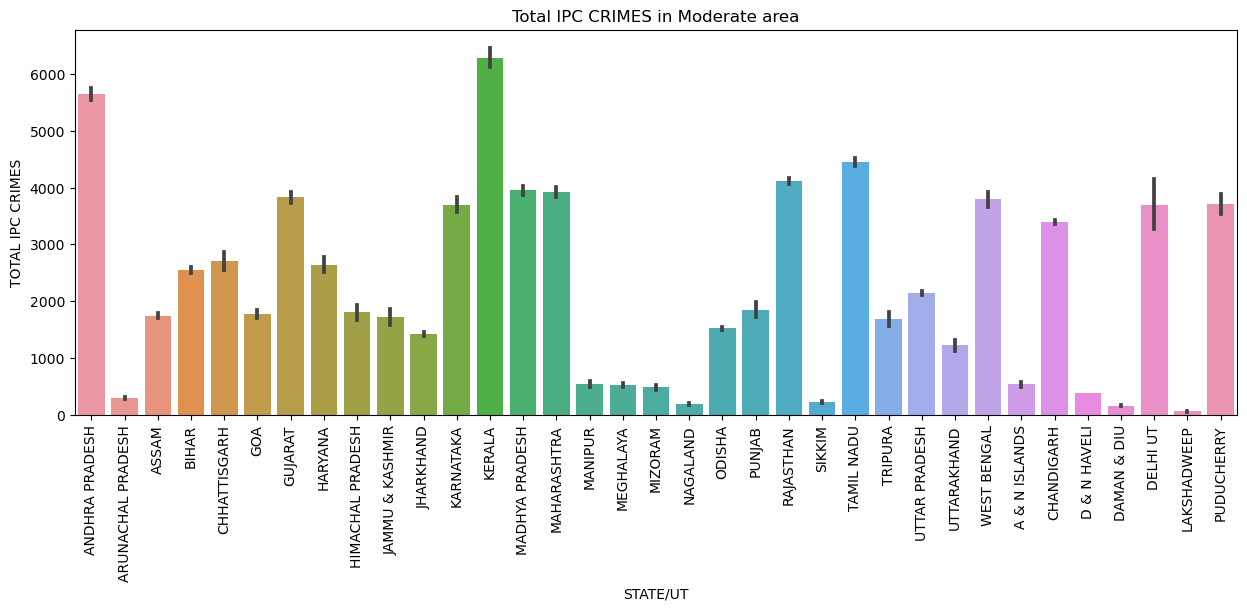

In [107]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=moderatearea)
plt.xticks(rotation='90')
plt.title("Total IPC CRIMES in Moderate area")
plt.savefig('Total IPC CRIMES in Moderate area.jpg')
plt.show()

In [110]:
tot_murder= moderatearea['MURDER'].sum()
tot_rape= moderatearea['RAPE'].sum()
tot_dowrydeaths = moderatearea['DOWRY DEATHS'].sum()

tot_kidnap= moderatearea['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= moderatearea['DACOITY'].sum()
tot_robbery = moderatearea['ROBBERY'].sum()
tot_burglary= moderatearea['BURGLARY'].sum()
tot_theft= moderatearea['THEFT'].sum()


crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,
          tot_theft,tot_riots]

colors = ['crimson','gold','green','yellow','blue','black']

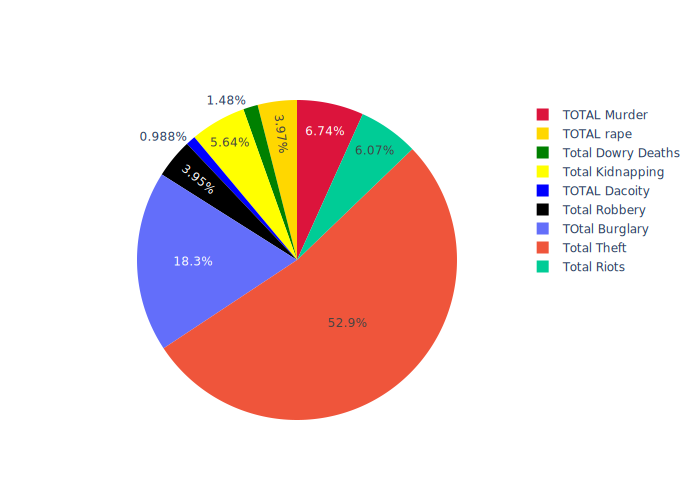

In [111]:
fig = go.Figure(data=[go.Pie(labels=crime_group, values=values,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show(renderer='svg')

In [112]:
moderatearea.groupby('DISTRICT').min()

,index,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
24 PARGANAS NORTH,7815,WEST BENGAL,2001,140,6,38,53,0,53,81,...,5,35,3,0,0,23,0,3036,6167,1
24 PARGANAS SOUTH,7827,WEST BENGAL,2001,107,2,25,47,0,47,53,...,0,4,1,6,0,43,0,3211,5827,1
A and N ISLANDS,58821,A & N ISLANDS,2007,15,19,1,3,0,3,12,...,7,23,1,11,99,1,4,337,807,1
ADILABAD,0,ANDHRA PRADESH,2001,73,39,8,35,0,35,41,...,11,104,0,17,1044,5,181,881,4154,1
AGRA,6786,UTTAR PRADESH,2001,109,116,18,26,0,26,99,...,83,122,3,4,360,38,40,896,3438,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOKHA,5105,NAGALAND,2001,1,2,0,0,0,0,0,...,0,0,0,0,2,0,0,4,47,1
YADGIRI,79811,KARNATAKA,2010,23,21,0,5,0,5,20,...,0,24,0,5,289,0,5,449,1486,1
YAMUNANAGAR,2245,HARYANA,2001,21,14,0,12,0,12,15,...,1,18,0,3,112,4,0,585,1283,1


In [113]:
moderatearea.groupby('DISTRICT')['THEFT'].sum().sort_values()

DISTRICT
CAW                       0
BIEO                      0
CRIME KASHMIR             0
RAILWAYS KMR              0
EOW                       0
                     ...   
MUMBAI COMMR.        597555
HYDERABAD CITY       674004
AHMEDABAD COMMR.     691860
BANGALORE COMMR.     999290
TOTAL               2043110
Name: THEFT, Length: 807, dtype: int64

In [114]:
moderatearea.loc[moderatearea['DISTRICT'] == 'SOUTH'].max()

index                                         102072
STATE/UT                                     TRIPURA
DISTRICT                                       SOUTH
YEAR                                            2012
MURDER                                            86
ATTEMPT TO MURDER                                 84
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER         13
RAPE                                              96
CUSTODIAL RAPE                                     0
OTHER RAPE                                        96
KIDNAPPING & ABDUCTION                           265
KIDNAPPING AND ABDUCTION OF OTHERS               111
DACOITY                                            9
PREPARATION AND ASSEMBLY FOR DACOITY             110
ROBBERY                                          120
BURGLARY                                         803
THEFT                                           4220
AUTO THEFT                                      2302
OTHER THEFT                                   

In [115]:
moderatearea.groupby('DISTRICT')['RIOTS'].sum().sort_values()

DISTRICT
CRIME SRINAGAR            0
CRIME JAMMU               0
CRIME KASHMIR             0
S.T.F.                    0
PATHANKOT                 0
                      ...  
PUNE COMMR.           76062
MALAPPURAM            87969
24 PARGANAS SOUTH    106716
KANNUR               116022
TOTAL                478750
Name: RIOTS, Length: 807, dtype: int64

In [116]:
moderatearea.loc[moderatearea['DISTRICT'] == 'KANNUR'].max()

index                                         97139
STATE/UT                                     KERALA
DISTRICT                                     KANNUR
YEAR                                           2012
MURDER                                           32
ATTEMPT TO MURDER                                63
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER        12
RAPE                                             66
CUSTODIAL RAPE                                    0
OTHER RAPE                                       66
KIDNAPPING & ABDUCTION                           23
KIDNAPPING AND ABDUCTION OF OTHERS                8
DACOITY                                          14
PREPARATION AND ASSEMBLY FOR DACOITY              5
ROBBERY                                          99
BURGLARY                                        277
THEFT                                           257
AUTO THEFT                                      103
OTHER THEFT                                     159
RIOTS       

In [117]:
moderatearea['STATE/UT'].value_counts()

UTTAR PRADESH        10178
MADHYA PRADESH        7232
MAHARASHTRA           6383
BIHAR                 6314
TAMIL NADU            5286
ODISHA                4931
RAJASTHAN             4731
KARNATAKA             4487
GUJARAT               4268
ANDHRA PRADESH        4074
ASSAM                 4037
JAMMU & KASHMIR       3524
JHARKHAND             3513
WEST BENGAL           3430
PUNJAB                3179
HARYANA               2981
CHHATTISGARH          2909
KERALA                2312
ARUNACHAL PRADESH     2225
HIMACHAL PRADESH      2040
UTTARAKHAND           2011
NAGALAND              1609
MANIPUR               1321
MIZORAM               1292
MEGHALAYA             1148
TRIPURA                727
SIKKIM                 719
GOA                    430
DAMAN & DIU            425
A & N ISLANDS          348
CHANDIGARH             287
D & N HAVELI           287
LAKSHADWEEP            287
PUDUCHERRY             266
DELHI UT               170
Name: STATE/UT, dtype: int64

In [119]:
pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)
#Pivot table representation of a particular crime by 'Year' and 'State' features

ARSON  ATTEMPT TO MURDER  AUTO THEFT  BURGLARY  \
STATE/UT       DISTRICT YEAR                                                   
ANDHRA PRADESH TOTAL    2001    872               1555        3051      7220   
ASSAM          TOTAL    2001    441                481         350      2423   
                        2002    438                479         496      2504   
                        2003    677                485         406      2606   
                        2004    379                410         685      2544   
...                             ...                ...         ...       ...   
WEST BENGAL    TOTAL    2004    103                390        2668       547   
                        2005     92                434        2435       739   
                        2006    111                672        2714       601   
                        2007    121                877        2421       399   
                        2008    150               1732        2593       462   

                              CAUSING DEATH BY NEGLIGENCE  CHEATING  \
STATE/UT       DISTRICT YEAR                                          
ANDHRA PRADESH TOTAL    2001                         7400      5391   
ASSAM          TOTAL    2001                         2010       575   
                        2002                         1957       719   
                        2003                         2086       894   
                        2004                         2239       865   
...                                                   ...       ...   
WEST BENGAL    TOTAL    2004                         2995      1686   
                        2005                         2737      1760   
                        2006                         3039      1947   
                        2007                         3803      2406   
                        2008                         3789      2938   

                              COUNTERFIETING  CRIMINAL BREACH OF TRUST  \
STATE/UT       DISTRICT YEAR                                             
ANDHRA PRADESH TOTAL    2001             144                       788   
ASSAM          TOTAL    2001              46                       374   
                        2002              57                       558   
                        2003              58                       611   
                        2004              57                       586   
...                                      ...                       ...   
WEST BENGAL    TOTAL    2004             125                       425   
                        2005             107                       528   
                        2006             135                       519   
                        2007             127                       672   
                        2008             148                       876   

                              CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
STATE/UT       DISTRICT YEAR                                              
ANDHRA PRADESH TOTAL    2001                                        136   
ASSAM          TOTAL    2001                                         40   
                        2002                                         55   
                        2003                                         48   
                        2004                                         63   
...                                                                 ...   
WEST BENGAL    TOTAL    2004                                        468   
                        2005                                        408   
                        2006                                        401   
                        2007                                        394   
                        2008                                        488   

                              CUSTODIAL RAPE  ...  MURDER  OTHER IPC CRIMES  \
STATE/UT       DISTRICT YEAR                  .

In [120]:
print("We have {} Rows and {} Columns in our dataframe Peaceful Area ".format(peacefularea.shape[0], peacefularea.shape[1]))


We have 874 Rows and 30 Columns in our dataframe Peaceful Area 


In [121]:
peacefularea['STATE/UT'].value_counts()

MADHYA PRADESH    144
MAHARASHTRA       144
BIHAR             143
UTTAR PRADESH     143
ANDHRA PRADESH    132
RAJASTHAN          96
WEST BENGAL        48
TAMIL NADU         24
Name: STATE/UT, dtype: int64

In [122]:
peacefularea['DISTRICT'].value_counts()

TOTAL    874
Name: DISTRICT, dtype: int64

In [123]:
peacefularea.describe().T

,count,mean,std,min,25%,50%,75%,max
index,874.0,55591.711670,30448.823976,1373.0,29288.25,58350.5,82774.75,101959.0
YEAR,874.0,2007.054920,3.514878,2001.0,2004.00,2007.0,2010.00,2012.0
MURDER,874.0,3015.061785,1273.362122,1259.0,2379.00,2693.0,3362.00,7601.0
ATTEMPT TO MURDER,874.0,2751.012586,1284.263013,1412.0,1860.00,2282.0,3303.00,7964.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,874.0,397.624714,484.275249,28.0,113.00,163.0,348.00,1616.0
RAPE,874.0,1657.590389,707.928709,677.0,1147.00,1442.0,1963.00,3425.0
CUSTODIAL RAPE,874.0,0.123570,0.329279,0.0,0.00,0.0,0.00,1.0
OTHER RAPE,874.0,1657.466819,707.963392,677.0,1147.00,1442.0,1963.00,3425.0
KIDNAPPING & ABDUCTION,874.0,2534.955378,1655.021821,808.0,1302.00,2154.0,3222.00,8878.0
KIDNAPPING AND ABDUCTION OF OTHERS,874.0,679.116705,463.187705,157.0,343.00,542.0,975.00,2416.0


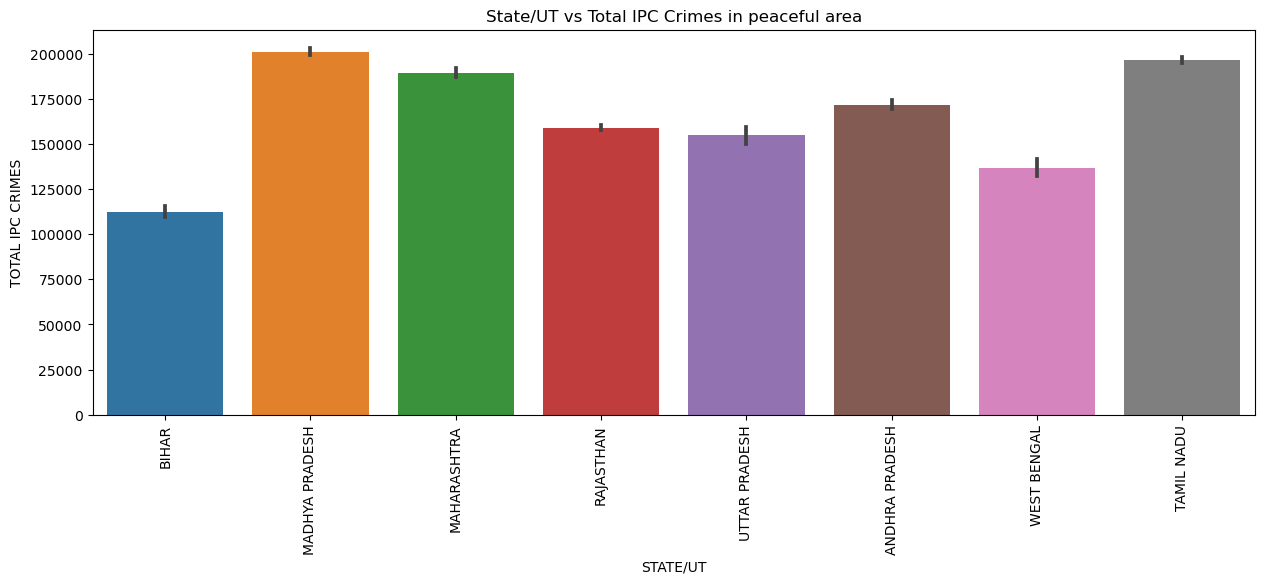

In [124]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=peacefularea)
plt.xticks(rotation='90')
plt.title('State/UT vs Total IPC Crimes in peaceful area')
plt.savefig('Total IPC Crimes in peaceful area.jpg')
plt.show()

In [126]:
tot_murder= peacefularea['MURDER'].sum()
tot_rape= peacefularea['RAPE'].sum()
tot_dowrydeaths = peacefularea['DOWRY DEATHS'].sum()

tot_kidnap= peacefularea['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= peacefularea['DACOITY'].sum()
tot_robbery = peacefularea['ROBBERY'].sum()
tot_burglary= peacefularea['BURGLARY'].sum()
tot_theft= peacefularea['THEFT'].sum()


crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,
          tot_theft,tot_riots]

colors = ['crimson','gold','green','yellow','blue','black']

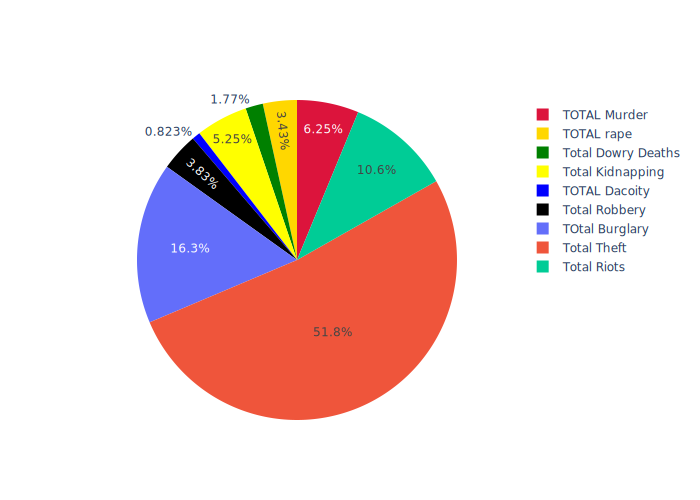

In [127]:
fig = go.Figure(data=[go.Pie(labels=crime_group, values=values,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show(renderer='svg')

In [128]:
peacefularea.groupby('DISTRICT').min()

,index,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,cluster
DISTRICT,,,,,,,,,,,,,,,,,,,,,
TOTAL,1373,ANDHRA PRADESH,2001,1259,1412,28,677,0,677,808,...,238,1222,12,170,7544,110,2405,29449,88432,2


In [129]:
peacefularea.groupby('DISTRICT')['THEFT'].sum().sort_values()

DISTRICT
TOTAL    21866804
Name: THEFT, dtype: int64

In [130]:
peacefularea[peacefularea['DISTRICT']=='G.R.P.'].max()

index                                        NaN
STATE/UT                                     NaN
DISTRICT                                     NaN
YEAR                                         NaN
MURDER                                       NaN
ATTEMPT TO MURDER                            NaN
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER    NaN
RAPE                                         NaN
CUSTODIAL RAPE                               NaN
OTHER RAPE                                   NaN
KIDNAPPING & ABDUCTION                       NaN
KIDNAPPING AND ABDUCTION OF OTHERS           NaN
DACOITY                                      NaN
PREPARATION AND ASSEMBLY FOR DACOITY         NaN
ROBBERY                                      NaN
BURGLARY                                     NaN
THEFT                                        NaN
AUTO THEFT                                   NaN
OTHER THEFT                                  NaN
RIOTS                                        NaN
CRIMINAL BREACH OF T

In [131]:
peacefularea['DISTRICT'].max()

'TOTAL'

In [132]:
peacefularea[peacefularea['DISTRICT']=='ZUNHEBOTO'].max()

index                                        NaN
STATE/UT                                     NaN
DISTRICT                                     NaN
YEAR                                         NaN
MURDER                                       NaN
ATTEMPT TO MURDER                            NaN
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER    NaN
RAPE                                         NaN
CUSTODIAL RAPE                               NaN
OTHER RAPE                                   NaN
KIDNAPPING & ABDUCTION                       NaN
KIDNAPPING AND ABDUCTION OF OTHERS           NaN
DACOITY                                      NaN
PREPARATION AND ASSEMBLY FOR DACOITY         NaN
ROBBERY                                      NaN
BURGLARY                                     NaN
THEFT                                        NaN
AUTO THEFT                                   NaN
OTHER THEFT                                  NaN
RIOTS                                        NaN
CRIMINAL BREACH OF T

In [133]:
peacefularea['DISTRICT'].min()

'TOTAL'

In [134]:
peacefularea[peacefularea['DISTRICT']=='A and N ISLANDS'].max()

index                                        NaN
STATE/UT                                     NaN
DISTRICT                                     NaN
YEAR                                         NaN
MURDER                                       NaN
ATTEMPT TO MURDER                            NaN
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER    NaN
RAPE                                         NaN
CUSTODIAL RAPE                               NaN
OTHER RAPE                                   NaN
KIDNAPPING & ABDUCTION                       NaN
KIDNAPPING AND ABDUCTION OF OTHERS           NaN
DACOITY                                      NaN
PREPARATION AND ASSEMBLY FOR DACOITY         NaN
ROBBERY                                      NaN
BURGLARY                                     NaN
THEFT                                        NaN
AUTO THEFT                                   NaN
OTHER THEFT                                  NaN
RIOTS                                        NaN
CRIMINAL BREACH OF T

In [135]:
silhouette_score(X,y_kmeans)#data and cluster

0.9413714515290512